## Importação das bibliotecas para EDA
Na célula abaixo sao importadas as principais bibliotecas utilizadas para fazer leitura e exploração do conjunto de dados Iris, disponível no link: [https://archive.ics.uci.edu/ml/datasets/Iris](https://archive.ics.uci.edu/ml/datasets/Iris)

In [1]:
import pandas as pd
import numpy as np; np.random.seed(42);
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Na célula abaixo é carregado o conjunto de dados como um dataframe e adicionado o nome das colunas.

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('data/iris.data', header=None, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Na célula abaixo é cria mostrada a matriz de correlação dos atributos.

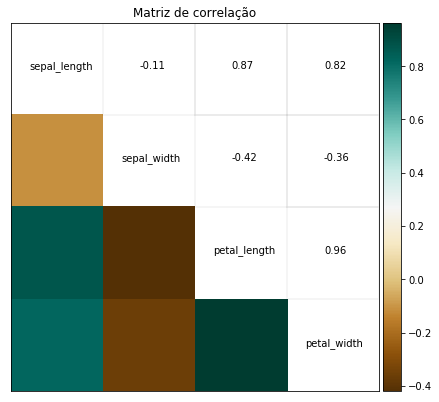

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))
cm = df.iloc[:, :4].corr()

mask = np.tri(cm.shape[0], k=0).T
cm = np.ma.array(cm, mask=mask)
im = ax.imshow(cm, interpolation='nearest', cmap='BrBG')
# plt.xticks(np.arange(4), df.columns[:-1].to_list(), rotation=45)
# plt.yticks(np.arange(4), df.columns[:-1].to_list(), rotation=45)
plt.yticks([]); plt.xticks([]);
plt.title('Matriz de correlação')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

for i in range(4):
    for j in range(4):
        if i == j:
            ax.text(j-.3, i, df.columns[j])
        if j>i:
            ax.text(j-.1, i, '%.2f'%cm[j][i])
            rec = plt.Rectangle((j-.5, i-.5), 1, 1, color="#0000000A", fill=False, linewidth=2)
            ax = ax or plt.gca()
            ax.add_patch(rec)
plt.savefig('results/correlation_matrix_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

Na célula abaixo é mostrada a média de cada atributo para cada uma das classes do conjunto de dados

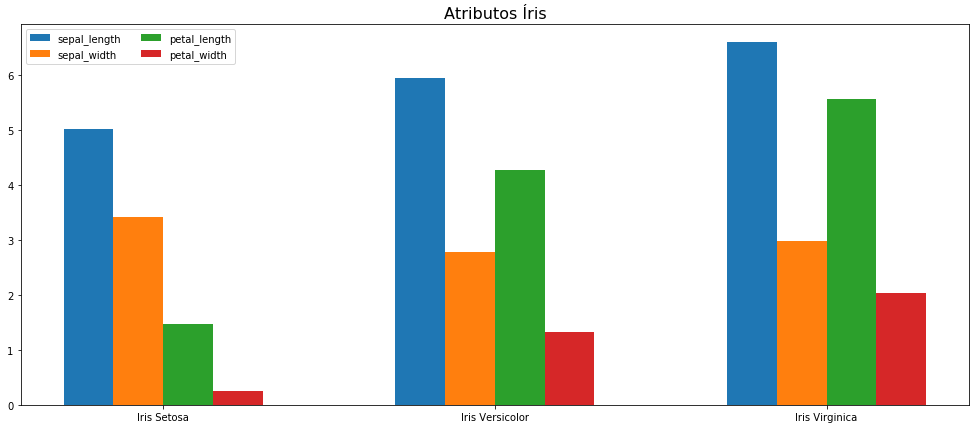

In [4]:
fig, ax = plt.subplots(figsize=(17, 7))
width = 0.15
labels = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = np.arange(len(labels))

setosa = df[df["class"] == "Iris-setosa"]
versicolor = df[df["class"] == "Iris-versicolor"]
virginica = df[df["class"] == "Iris-virginica"]

for i, att in enumerate(attrs):
    y = [setosa[att].values.mean(), versicolor[att].values.mean(), 
         virginica[att].values.mean()]
    ax.bar(x-width/2, y, width, label=att)
    x = x+width

ax.set_xticks(x-(width*3))
ax.set_xticklabels(labels)
ax.set_title('Atributos Íris', fontdict=dict(size=16))
plt.legend(ncol=2)

plt.savefig('results/attributes_bar_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

Na célula abaixa é criado o gráfico do tipo boxplot, mostrando a distribuição dos valores de cada atributo para cada uma das classes.

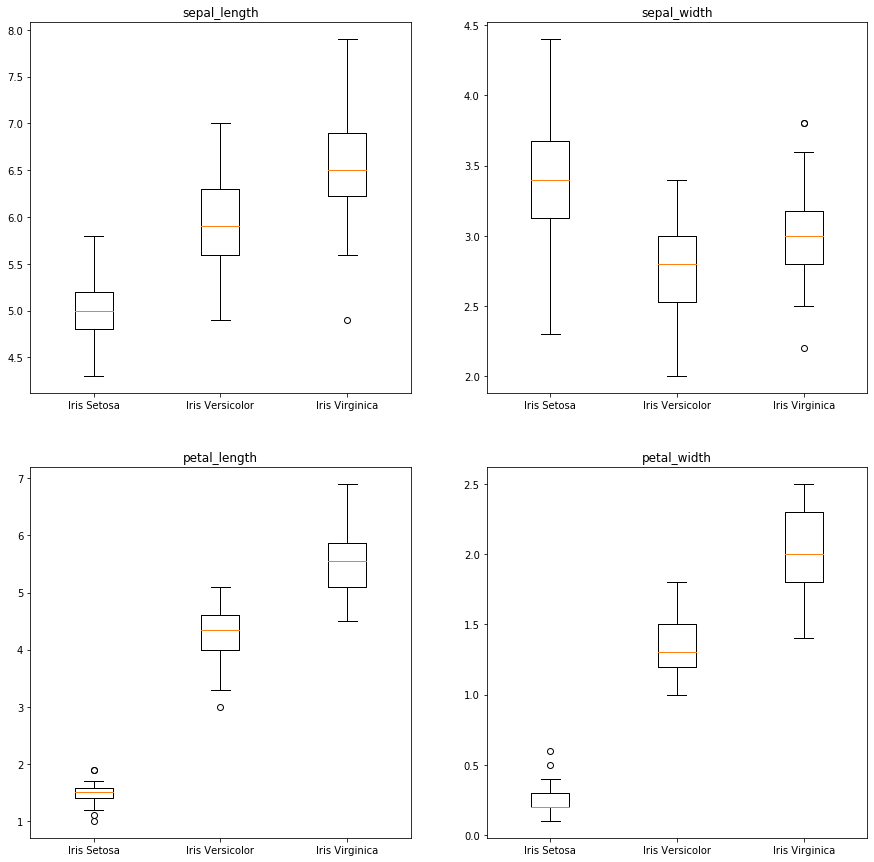

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
idx = 0
for i in range(2):
    for j in range(2):
        y = [setosa[attrs[idx]], versicolor[attrs[idx]], virginica[attrs[idx]]]
#         print(y)
        _ = ax[i][j].boxplot(y)
        _ = ax[i][j].set_xticklabels(labels)
        _ = ax[i][j].set_title(attrs[idx])
        idx+=1
plt.savefig('results/attributes_boxplot_iris.pdf', dpi=600, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

# Importação das biblioetecas do modelo

Foi utilizada a biblioteca [https://keras.io](https://keras.io) para criar a estrutura da rede MLP e a biblioteca [https://scikit-learn.org](https://scikit-learn.org) para o preprocessamento dos dados.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras import optimizers
from sklearn.metrics import confusion_matrix


X = df.iloc[:, :4].values
y = df.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
y = np_utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 1ms/step - loss: 0.3125 - categorical_accuracy: 0.3417 - val_loss: 0.3018 - val_categorical_accuracy: 0.3000
Epoch 2/300
120/120 [==============================] - 0s 48us/step - loss: 0.2754 - categorical_accuracy: 0.3417 - val_loss: 0.2595 - val_categorical_accuracy: 0.3000
Epoch 3/300
120/120 [==============================] - 0s 47us/step - loss: 0.2442 - categorical_accuracy: 0.3417 - val_loss: 0.2345 - val_categorical_accuracy: 0.3000
Epoch 4/300
120/120 [==============================] - 0s 57us/step - loss: 0.2269 - categorical_accuracy: 0.3417 - val_loss: 0.2186 - val_categorical_accuracy: 0.3667
Epoch 5/300
120/120 [==============================] - 0s 40us/step - loss: 0.2163 - categorical_accuracy: 0.4250 - val_loss: 0.2087 - val_categorical_accuracy: 0.3

Epoch 46/300
120/120 [==============================] - 0s 35us/step - loss: 0.1414 - categorical_accuracy: 0.6583 - val_loss: 0.1367 - val_categorical_accuracy: 0.7000
Epoch 47/300
120/120 [==============================] - 0s 42us/step - loss: 0.1402 - categorical_accuracy: 0.6583 - val_loss: 0.1361 - val_categorical_accuracy: 0.7000
Epoch 48/300
120/120 [==============================] - 0s 50us/step - loss: 0.1393 - categorical_accuracy: 0.6583 - val_loss: 0.1354 - val_categorical_accuracy: 0.7000
Epoch 49/300
120/120 [==============================] - 0s 38us/step - loss: 0.1389 - categorical_accuracy: 0.6583 - val_loss: 0.1344 - val_categorical_accuracy: 0.7000
Epoch 50/300
120/120 [==============================] - 0s 48us/step - loss: 0.1379 - categorical_accuracy: 0.6583 - val_loss: 0.1338 - val_categorical_accuracy: 0.7000
Epoch 51/300
120/120 [==============================] - 0s 32us/step - loss: 0.1374 - categorical_accuracy: 0.6583 - val_loss: 0.1330 - val_categorical_acc

120/120 [==============================] - 0s 43us/step - loss: 0.1169 - categorical_accuracy: 0.7000 - val_loss: 0.1147 - val_categorical_accuracy: 0.7333
Epoch 95/300
120/120 [==============================] - 0s 42us/step - loss: 0.1174 - categorical_accuracy: 0.7000 - val_loss: 0.1141 - val_categorical_accuracy: 0.7333
Epoch 96/300
120/120 [==============================] - 0s 32us/step - loss: 0.1166 - categorical_accuracy: 0.6667 - val_loss: 0.1142 - val_categorical_accuracy: 0.7333
Epoch 97/300
120/120 [==============================] - 0s 43us/step - loss: 0.1164 - categorical_accuracy: 0.7083 - val_loss: 0.1137 - val_categorical_accuracy: 0.7333
Epoch 98/300
120/120 [==============================] - 0s 43us/step - loss: 0.1156 - categorical_accuracy: 0.6833 - val_loss: 0.1135 - val_categorical_accuracy: 0.7333
Epoch 99/300
120/120 [==============================] - 0s 41us/step - loss: 0.1155 - categorical_accuracy: 0.6833 - val_loss: 0.1132 - val_categorical_accuracy: 0.7333

Epoch 142/300
120/120 [==============================] - 0s 52us/step - loss: 0.1046 - categorical_accuracy: 0.8000 - val_loss: 0.1038 - val_categorical_accuracy: 0.8333
Epoch 143/300
120/120 [==============================] - 0s 40us/step - loss: 0.1045 - categorical_accuracy: 0.8333 - val_loss: 0.1040 - val_categorical_accuracy: 0.8333
Epoch 144/300
120/120 [==============================] - 0s 41us/step - loss: 0.1040 - categorical_accuracy: 0.8583 - val_loss: 0.1038 - val_categorical_accuracy: 0.8333
Epoch 145/300
120/120 [==============================] - 0s 57us/step - loss: 0.1039 - categorical_accuracy: 0.8667 - val_loss: 0.1035 - val_categorical_accuracy: 0.8333
Epoch 146/300
120/120 [==============================] - 0s 38us/step - loss: 0.1039 - categorical_accuracy: 0.8667 - val_loss: 0.1035 - val_categorical_accuracy: 0.8333
Epoch 147/300
120/120 [==============================] - 0s 57us/step - loss: 0.1039 - categorical_accuracy: 0.8750 - val_loss: 0.1029 - val_categoric

120/120 [==============================] - 0s 38us/step - loss: 0.0952 - categorical_accuracy: 0.9000 - val_loss: 0.0959 - val_categorical_accuracy: 0.9000
Epoch 191/300
120/120 [==============================] - 0s 35us/step - loss: 0.0950 - categorical_accuracy: 0.9167 - val_loss: 0.0954 - val_categorical_accuracy: 0.9000
Epoch 192/300
120/120 [==============================] - 0s 45us/step - loss: 0.0952 - categorical_accuracy: 0.9250 - val_loss: 0.0951 - val_categorical_accuracy: 0.9000
Epoch 193/300
120/120 [==============================] - 0s 31us/step - loss: 0.0948 - categorical_accuracy: 0.9250 - val_loss: 0.0949 - val_categorical_accuracy: 0.9000
Epoch 194/300
120/120 [==============================] - 0s 39us/step - loss: 0.0953 - categorical_accuracy: 0.9167 - val_loss: 0.0945 - val_categorical_accuracy: 0.8333
Epoch 195/300
120/120 [==============================] - 0s 46us/step - loss: 0.0944 - categorical_accuracy: 0.9167 - val_loss: 0.0944 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 32us/step - loss: 0.0876 - categorical_accuracy: 0.9333 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 239/300
120/120 [==============================] - 0s 42us/step - loss: 0.0870 - categorical_accuracy: 0.9500 - val_loss: 0.0885 - val_categorical_accuracy: 0.8667
Epoch 240/300
120/120 [==============================] - 0s 40us/step - loss: 0.0869 - categorical_accuracy: 0.9250 - val_loss: 0.0885 - val_categorical_accuracy: 0.8667
Epoch 241/300
120/120 [==============================] - 0s 32us/step - loss: 0.0868 - categorical_accuracy: 0.9583 - val_loss: 0.0881 - val_categorical_accuracy: 0.9000
Epoch 242/300
120/120 [==============================] - 0s 47us/step - loss: 0.0864 - categorical_accuracy: 0.9417 - val_loss: 0.0881 - val_categorical_accuracy: 0.8667
Epoch 243/300
120/120 [==============================] - 0s 37us/step - loss: 0.0864 - categorical_accuracy: 0.9333 - val_loss: 0.0881 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 32us/step - loss: 0.0798 - categorical_accuracy: 0.9583 - val_loss: 0.0823 - val_categorical_accuracy: 0.9000
Epoch 287/300
120/120 [==============================] - 0s 41us/step - loss: 0.0804 - categorical_accuracy: 0.9417 - val_loss: 0.0827 - val_categorical_accuracy: 0.9333
Epoch 288/300
120/120 [==============================] - 0s 35us/step - loss: 0.0797 - categorical_accuracy: 0.9583 - val_loss: 0.0827 - val_categorical_accuracy: 0.9333
Epoch 289/300
120/120 [==============================] - 0s 36us/step - loss: 0.0799 - categorical_accuracy: 0.9583 - val_loss: 0.0828 - val_categorical_accuracy: 0.9000
Epoch 290/300
120/120 [==============================] - 0s 42us/step - loss: 0.0794 - categorical_accuracy: 0.9583 - val_loss: 0.0822 - val_categorical_accuracy: 0.9333
Epoch 291/300
120/120 [==============================] - 0s 39us/step - loss: 0.0792 - categorical_accuracy: 0.9583 - val_loss: 0.0819 - val_categorical_accuracy: 0

Epoch 34/300
120/120 [==============================] - 0s 54us/step - loss: 0.2417 - categorical_accuracy: 0.6750 - val_loss: 0.2585 - val_categorical_accuracy: 0.6333
Epoch 35/300
120/120 [==============================] - 0s 37us/step - loss: 0.2410 - categorical_accuracy: 0.6750 - val_loss: 0.2580 - val_categorical_accuracy: 0.6333
Epoch 36/300
120/120 [==============================] - 0s 50us/step - loss: 0.2403 - categorical_accuracy: 0.6750 - val_loss: 0.2574 - val_categorical_accuracy: 0.6333
Epoch 37/300
120/120 [==============================] - 0s 34us/step - loss: 0.2397 - categorical_accuracy: 0.6750 - val_loss: 0.2569 - val_categorical_accuracy: 0.6333
Epoch 38/300
120/120 [==============================] - 0s 44us/step - loss: 0.2391 - categorical_accuracy: 0.6750 - val_loss: 0.2564 - val_categorical_accuracy: 0.6333
Epoch 39/300
120/120 [==============================] - 0s 40us/step - loss: 0.2386 - categorical_accuracy: 0.6750 - val_loss: 0.2560 - val_categorical_acc

120/120 [==============================] - 0s 36us/step - loss: 0.2235 - categorical_accuracy: 0.6750 - val_loss: 0.2429 - val_categorical_accuracy: 0.6333
Epoch 83/300
120/120 [==============================] - 0s 48us/step - loss: 0.2231 - categorical_accuracy: 0.6750 - val_loss: 0.2426 - val_categorical_accuracy: 0.6333
Epoch 84/300
120/120 [==============================] - 0s 40us/step - loss: 0.2230 - categorical_accuracy: 0.6750 - val_loss: 0.2423 - val_categorical_accuracy: 0.6333
Epoch 85/300
120/120 [==============================] - 0s 40us/step - loss: 0.2227 - categorical_accuracy: 0.6750 - val_loss: 0.2421 - val_categorical_accuracy: 0.6333
Epoch 86/300
120/120 [==============================] - 0s 48us/step - loss: 0.2225 - categorical_accuracy: 0.6750 - val_loss: 0.2420 - val_categorical_accuracy: 0.6333
Epoch 87/300
120/120 [==============================] - 0s 34us/step - loss: 0.2224 - categorical_accuracy: 0.6750 - val_loss: 0.2421 - val_categorical_accuracy: 0.6333

120/120 [==============================] - 0s 37us/step - loss: 0.2169 - categorical_accuracy: 0.6750 - val_loss: 0.2375 - val_categorical_accuracy: 0.6333
Epoch 131/300
120/120 [==============================] - 0s 47us/step - loss: 0.2166 - categorical_accuracy: 0.6750 - val_loss: 0.2373 - val_categorical_accuracy: 0.6333
Epoch 132/300
120/120 [==============================] - 0s 38us/step - loss: 0.2165 - categorical_accuracy: 0.6750 - val_loss: 0.2373 - val_categorical_accuracy: 0.6333
Epoch 133/300
120/120 [==============================] - 0s 45us/step - loss: 0.2164 - categorical_accuracy: 0.6750 - val_loss: 0.2372 - val_categorical_accuracy: 0.6333
Epoch 134/300
120/120 [==============================] - 0s 48us/step - loss: 0.2163 - categorical_accuracy: 0.6750 - val_loss: 0.2371 - val_categorical_accuracy: 0.6333
Epoch 135/300
120/120 [==============================] - 0s 41us/step - loss: 0.2163 - categorical_accuracy: 0.6750 - val_loss: 0.2371 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 39us/step - loss: 0.2141 - categorical_accuracy: 0.6750 - val_loss: 0.2352 - val_categorical_accuracy: 0.6333
Epoch 179/300
120/120 [==============================] - 0s 47us/step - loss: 0.2142 - categorical_accuracy: 0.6750 - val_loss: 0.2354 - val_categorical_accuracy: 0.6333
Epoch 180/300
120/120 [==============================] - 0s 43us/step - loss: 0.2140 - categorical_accuracy: 0.6750 - val_loss: 0.2354 - val_categorical_accuracy: 0.6333
Epoch 181/300
120/120 [==============================] - 0s 41us/step - loss: 0.2141 - categorical_accuracy: 0.6750 - val_loss: 0.2354 - val_categorical_accuracy: 0.6333
Epoch 182/300
120/120 [==============================] - 0s 39us/step - loss: 0.2141 - categorical_accuracy: 0.6750 - val_loss: 0.2356 - val_categorical_accuracy: 0.6333
Epoch 183/300
120/120 [==============================] - 0s 43us/step - loss: 0.2139 - categorical_accuracy: 0.6750 - val_loss: 0.2355 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 44us/step - loss: 0.2127 - categorical_accuracy: 0.6750 - val_loss: 0.2345 - val_categorical_accuracy: 0.6333
Epoch 227/300
120/120 [==============================] - 0s 53us/step - loss: 0.2127 - categorical_accuracy: 0.6750 - val_loss: 0.2345 - val_categorical_accuracy: 0.6333
Epoch 228/300
120/120 [==============================] - 0s 33us/step - loss: 0.2128 - categorical_accuracy: 0.6750 - val_loss: 0.2344 - val_categorical_accuracy: 0.6333
Epoch 229/300
120/120 [==============================] - 0s 52us/step - loss: 0.2127 - categorical_accuracy: 0.6750 - val_loss: 0.2342 - val_categorical_accuracy: 0.6333
Epoch 230/300
120/120 [==============================] - 0s 40us/step - loss: 0.2127 - categorical_accuracy: 0.6750 - val_loss: 0.2341 - val_categorical_accuracy: 0.6333
Epoch 231/300
120/120 [==============================] - 0s 49us/step - loss: 0.2127 - categorical_accuracy: 0.6750 - val_loss: 0.2342 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 49us/step - loss: 0.2119 - categorical_accuracy: 0.6750 - val_loss: 0.2337 - val_categorical_accuracy: 0.6333
Epoch 275/300
120/120 [==============================] - 0s 34us/step - loss: 0.2120 - categorical_accuracy: 0.6750 - val_loss: 0.2337 - val_categorical_accuracy: 0.6333
Epoch 276/300
120/120 [==============================] - 0s 56us/step - loss: 0.2119 - categorical_accuracy: 0.6750 - val_loss: 0.2337 - val_categorical_accuracy: 0.6333
Epoch 277/300
120/120 [==============================] - 0s 39us/step - loss: 0.2120 - categorical_accuracy: 0.6750 - val_loss: 0.2338 - val_categorical_accuracy: 0.6333
Epoch 278/300
120/120 [==============================] - 0s 50us/step - loss: 0.2119 - categorical_accuracy: 0.6750 - val_loss: 0.2339 - val_categorical_accuracy: 0.6333
Epoch 279/300
120/120 [==============================] - 0s 41us/step - loss: 0.2118 - categorical_accuracy: 0.6750 - val_loss: 0.2339 - val_categorical_accuracy: 0

Epoch 22/300
120/120 [==============================] - 0s 42us/step - loss: 0.1595 - categorical_accuracy: 0.6583 - val_loss: 0.1530 - val_categorical_accuracy: 0.7000
Epoch 23/300
120/120 [==============================] - 0s 40us/step - loss: 0.1579 - categorical_accuracy: 0.6583 - val_loss: 0.1520 - val_categorical_accuracy: 0.7000
Epoch 24/300
120/120 [==============================] - 0s 45us/step - loss: 0.1567 - categorical_accuracy: 0.6583 - val_loss: 0.1509 - val_categorical_accuracy: 0.7000
Epoch 25/300
120/120 [==============================] - 0s 45us/step - loss: 0.1556 - categorical_accuracy: 0.6583 - val_loss: 0.1498 - val_categorical_accuracy: 0.7000
Epoch 26/300
120/120 [==============================] - 0s 35us/step - loss: 0.1546 - categorical_accuracy: 0.6583 - val_loss: 0.1487 - val_categorical_accuracy: 0.7000
Epoch 27/300
120/120 [==============================] - 0s 45us/step - loss: 0.1536 - categorical_accuracy: 0.6583 - val_loss: 0.1478 - val_categorical_acc

120/120 [==============================] - 0s 38us/step - loss: 0.1190 - categorical_accuracy: 0.8583 - val_loss: 0.1157 - val_categorical_accuracy: 0.8667
Epoch 71/300
120/120 [==============================] - 0s 45us/step - loss: 0.1187 - categorical_accuracy: 0.8500 - val_loss: 0.1147 - val_categorical_accuracy: 0.8333
Epoch 72/300
120/120 [==============================] - 0s 46us/step - loss: 0.1177 - categorical_accuracy: 0.8667 - val_loss: 0.1144 - val_categorical_accuracy: 0.8667
Epoch 73/300
120/120 [==============================] - 0s 32us/step - loss: 0.1169 - categorical_accuracy: 0.8667 - val_loss: 0.1136 - val_categorical_accuracy: 0.8333
Epoch 74/300
120/120 [==============================] - 0s 52us/step - loss: 0.1163 - categorical_accuracy: 0.8583 - val_loss: 0.1130 - val_categorical_accuracy: 0.8333
Epoch 75/300
120/120 [==============================] - 0s 34us/step - loss: 0.1157 - categorical_accuracy: 0.8417 - val_loss: 0.1123 - val_categorical_accuracy: 0.8333

120/120 [==============================] - 0s 41us/step - loss: 0.0943 - categorical_accuracy: 0.9417 - val_loss: 0.0930 - val_categorical_accuracy: 0.9000
Epoch 119/300
120/120 [==============================] - 0s 45us/step - loss: 0.0942 - categorical_accuracy: 0.9000 - val_loss: 0.0923 - val_categorical_accuracy: 0.8667
Epoch 120/300
120/120 [==============================] - 0s 36us/step - loss: 0.0936 - categorical_accuracy: 0.9417 - val_loss: 0.0922 - val_categorical_accuracy: 0.9333
Epoch 121/300
120/120 [==============================] - 0s 45us/step - loss: 0.0928 - categorical_accuracy: 0.9167 - val_loss: 0.0917 - val_categorical_accuracy: 0.8667
Epoch 122/300
120/120 [==============================] - 0s 43us/step - loss: 0.0925 - categorical_accuracy: 0.9167 - val_loss: 0.0913 - val_categorical_accuracy: 0.8667
Epoch 123/300
120/120 [==============================] - 0s 36us/step - loss: 0.0922 - categorical_accuracy: 0.9333 - val_loss: 0.0909 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 45us/step - loss: 0.0770 - categorical_accuracy: 0.9500 - val_loss: 0.0779 - val_categorical_accuracy: 0.9333
Epoch 167/300
120/120 [==============================] - 0s 34us/step - loss: 0.0769 - categorical_accuracy: 0.9500 - val_loss: 0.0775 - val_categorical_accuracy: 0.9333
Epoch 168/300
120/120 [==============================] - 0s 42us/step - loss: 0.0765 - categorical_accuracy: 0.9500 - val_loss: 0.0770 - val_categorical_accuracy: 0.9333
Epoch 169/300
120/120 [==============================] - 0s 49us/step - loss: 0.0763 - categorical_accuracy: 0.9417 - val_loss: 0.0769 - val_categorical_accuracy: 0.9333
Epoch 170/300
120/120 [==============================] - 0s 32us/step - loss: 0.0763 - categorical_accuracy: 0.9417 - val_loss: 0.0769 - val_categorical_accuracy: 0.9333
Epoch 171/300
120/120 [==============================] - 0s 56us/step - loss: 0.0761 - categorical_accuracy: 0.9500 - val_loss: 0.0768 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 44us/step - loss: 0.0637 - categorical_accuracy: 0.9500 - val_loss: 0.0657 - val_categorical_accuracy: 0.9333
Epoch 215/300
120/120 [==============================] - 0s 32us/step - loss: 0.0640 - categorical_accuracy: 0.9500 - val_loss: 0.0656 - val_categorical_accuracy: 0.9333
Epoch 216/300
120/120 [==============================] - 0s 45us/step - loss: 0.0633 - categorical_accuracy: 0.9500 - val_loss: 0.0654 - val_categorical_accuracy: 0.9333
Epoch 217/300
120/120 [==============================] - 0s 40us/step - loss: 0.0631 - categorical_accuracy: 0.9500 - val_loss: 0.0652 - val_categorical_accuracy: 0.9333
Epoch 218/300
120/120 [==============================] - 0s 36us/step - loss: 0.0630 - categorical_accuracy: 0.9500 - val_loss: 0.0650 - val_categorical_accuracy: 0.9333
Epoch 219/300
120/120 [==============================] - 0s 49us/step - loss: 0.0630 - categorical_accuracy: 0.9500 - val_loss: 0.0649 - val_categorical_accuracy: 0

Epoch 262/300
120/120 [==============================] - 0s 39us/step - loss: 0.0538 - categorical_accuracy: 0.9500 - val_loss: 0.0569 - val_categorical_accuracy: 0.9667
Epoch 263/300
120/120 [==============================] - 0s 37us/step - loss: 0.0538 - categorical_accuracy: 0.9500 - val_loss: 0.0571 - val_categorical_accuracy: 0.9667
Epoch 264/300
120/120 [==============================] - 0s 45us/step - loss: 0.0533 - categorical_accuracy: 0.9583 - val_loss: 0.0570 - val_categorical_accuracy: 0.9667
Epoch 265/300
120/120 [==============================] - 0s 32us/step - loss: 0.0535 - categorical_accuracy: 0.9500 - val_loss: 0.0567 - val_categorical_accuracy: 0.9667
Epoch 266/300
120/120 [==============================] - 0s 41us/step - loss: 0.0534 - categorical_accuracy: 0.9583 - val_loss: 0.0567 - val_categorical_accuracy: 0.9667
Epoch 267/300
120/120 [==============================] - 0s 46us/step - loss: 0.0529 - categorical_accuracy: 0.9500 - val_loss: 0.0563 - val_categoric

Epoch 10/300
120/120 [==============================] - 0s 47us/step - loss: 0.2101 - categorical_accuracy: 0.6583 - val_loss: 0.1889 - val_categorical_accuracy: 0.7000
Epoch 11/300
120/120 [==============================] - 0s 34us/step - loss: 0.1955 - categorical_accuracy: 0.6583 - val_loss: 0.1771 - val_categorical_accuracy: 0.7000
Epoch 12/300
120/120 [==============================] - 0s 51us/step - loss: 0.1841 - categorical_accuracy: 0.6583 - val_loss: 0.1680 - val_categorical_accuracy: 0.7000
Epoch 13/300
120/120 [==============================] - 0s 42us/step - loss: 0.1742 - categorical_accuracy: 0.6583 - val_loss: 0.1597 - val_categorical_accuracy: 0.7000
Epoch 14/300
120/120 [==============================] - 0s 46us/step - loss: 0.1657 - categorical_accuracy: 0.6583 - val_loss: 0.1537 - val_categorical_accuracy: 0.7000
Epoch 15/300
120/120 [==============================] - 0s 44us/step - loss: 0.1610 - categorical_accuracy: 0.6583 - val_loss: 0.1493 - val_categorical_acc

120/120 [==============================] - 0s 40us/step - loss: 0.0818 - categorical_accuracy: 0.9417 - val_loss: 0.0811 - val_categorical_accuracy: 0.9667
Epoch 59/300
120/120 [==============================] - 0s 37us/step - loss: 0.0813 - categorical_accuracy: 0.9417 - val_loss: 0.0805 - val_categorical_accuracy: 0.9667
Epoch 60/300
120/120 [==============================] - 0s 39us/step - loss: 0.0804 - categorical_accuracy: 0.9417 - val_loss: 0.0797 - val_categorical_accuracy: 0.9667
Epoch 61/300
120/120 [==============================] - 0s 37us/step - loss: 0.0793 - categorical_accuracy: 0.9500 - val_loss: 0.0790 - val_categorical_accuracy: 0.9667
Epoch 62/300
120/120 [==============================] - 0s 37us/step - loss: 0.0785 - categorical_accuracy: 0.9750 - val_loss: 0.0785 - val_categorical_accuracy: 0.9667
Epoch 63/300
120/120 [==============================] - 0s 42us/step - loss: 0.0778 - categorical_accuracy: 0.9750 - val_loss: 0.0776 - val_categorical_accuracy: 0.9667

120/120 [==============================] - 0s 39us/step - loss: 0.0513 - categorical_accuracy: 0.9833 - val_loss: 0.0550 - val_categorical_accuracy: 0.9667
Epoch 107/300
120/120 [==============================] - 0s 48us/step - loss: 0.0512 - categorical_accuracy: 0.9750 - val_loss: 0.0546 - val_categorical_accuracy: 0.9667
Epoch 108/300
120/120 [==============================] - 0s 39us/step - loss: 0.0505 - categorical_accuracy: 0.9750 - val_loss: 0.0541 - val_categorical_accuracy: 0.9667
Epoch 109/300
120/120 [==============================] - 0s 47us/step - loss: 0.0502 - categorical_accuracy: 0.9833 - val_loss: 0.0541 - val_categorical_accuracy: 0.9667
Epoch 110/300
120/120 [==============================] - 0s 47us/step - loss: 0.0496 - categorical_accuracy: 0.9833 - val_loss: 0.0535 - val_categorical_accuracy: 0.9667
Epoch 111/300
120/120 [==============================] - 0s 41us/step - loss: 0.0490 - categorical_accuracy: 0.9833 - val_loss: 0.0530 - val_categorical_accuracy: 0

Epoch 154/300
120/120 [==============================] - 0s 48us/step - loss: 0.0371 - categorical_accuracy: 0.9750 - val_loss: 0.0421 - val_categorical_accuracy: 0.9667
Epoch 155/300
120/120 [==============================] - 0s 35us/step - loss: 0.0362 - categorical_accuracy: 0.9833 - val_loss: 0.0428 - val_categorical_accuracy: 1.0000
Epoch 156/300
120/120 [==============================] - 0s 39us/step - loss: 0.0365 - categorical_accuracy: 0.9833 - val_loss: 0.0422 - val_categorical_accuracy: 0.9667
Epoch 157/300
120/120 [==============================] - 0s 43us/step - loss: 0.0360 - categorical_accuracy: 0.9833 - val_loss: 0.0415 - val_categorical_accuracy: 0.9667
Epoch 158/300
120/120 [==============================] - 0s 33us/step - loss: 0.0359 - categorical_accuracy: 0.9833 - val_loss: 0.0415 - val_categorical_accuracy: 0.9667
Epoch 159/300
120/120 [==============================] - 0s 48us/step - loss: 0.0362 - categorical_accuracy: 0.9833 - val_loss: 0.0411 - val_categoric

120/120 [==============================] - 0s 38us/step - loss: 0.0297 - categorical_accuracy: 0.9833 - val_loss: 0.0358 - val_categorical_accuracy: 0.9667
Epoch 203/300
120/120 [==============================] - 0s 46us/step - loss: 0.0292 - categorical_accuracy: 0.9833 - val_loss: 0.0352 - val_categorical_accuracy: 0.9667
Epoch 204/300
120/120 [==============================] - 0s 38us/step - loss: 0.0294 - categorical_accuracy: 0.9833 - val_loss: 0.0356 - val_categorical_accuracy: 0.9667
Epoch 205/300
120/120 [==============================] - 0s 47us/step - loss: 0.0291 - categorical_accuracy: 0.9750 - val_loss: 0.0350 - val_categorical_accuracy: 0.9667
Epoch 206/300
120/120 [==============================] - 0s 39us/step - loss: 0.0291 - categorical_accuracy: 0.9833 - val_loss: 0.0352 - val_categorical_accuracy: 0.9667
Epoch 207/300
120/120 [==============================] - 0s 36us/step - loss: 0.0289 - categorical_accuracy: 0.9833 - val_loss: 0.0348 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 36us/step - loss: 0.0252 - categorical_accuracy: 0.9750 - val_loss: 0.0318 - val_categorical_accuracy: 1.0000
Epoch 251/300
120/120 [==============================] - 0s 49us/step - loss: 0.0252 - categorical_accuracy: 0.9833 - val_loss: 0.0321 - val_categorical_accuracy: 1.0000
Epoch 252/300
120/120 [==============================] - 0s 43us/step - loss: 0.0251 - categorical_accuracy: 0.9833 - val_loss: 0.0316 - val_categorical_accuracy: 1.0000
Epoch 253/300
120/120 [==============================] - 0s 35us/step - loss: 0.0249 - categorical_accuracy: 0.9833 - val_loss: 0.0313 - val_categorical_accuracy: 0.9667
Epoch 254/300
120/120 [==============================] - 0s 52us/step - loss: 0.0250 - categorical_accuracy: 0.9833 - val_loss: 0.0316 - val_categorical_accuracy: 1.0000
Epoch 255/300
120/120 [==============================] - 0s 36us/step - loss: 0.0249 - categorical_accuracy: 0.9750 - val_loss: 0.0310 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 33us/step - loss: 0.0226 - categorical_accuracy: 0.9833 - val_loss: 0.0291 - val_categorical_accuracy: 1.0000
Epoch 299/300
120/120 [==============================] - 0s 48us/step - loss: 0.0225 - categorical_accuracy: 0.9833 - val_loss: 0.0281 - val_categorical_accuracy: 0.9667
Epoch 300/300
120/120 [==============================] - 0s 39us/step - loss: 0.0228 - categorical_accuracy: 0.9750 - val_loss: 0.0283 - val_categorical_accuracy: 0.9667
filename:  results/metrics_001_iris_lr0.01_m0.75.pdf
Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 615us/step - loss: 0.2266 - categorical_accuracy: 0.5500 - val_loss: 0.2017 - val_categorical_accuracy: 0.6333
Epoch 2/300
120/120 [==============================] - 0s 42us/step - loss: 0.2026 - categorical_accuracy: 0.6083 - val_loss: 0.1812 - val_categorical_accuracy: 0.5667
Epoch 3/300
120/120 [==============================] - 0s 37us/step -

120/120 [==============================] - 0s 38us/step - loss: 0.0191 - categorical_accuracy: 0.9667 - val_loss: 0.0193 - val_categorical_accuracy: 0.9667
Epoch 47/300
120/120 [==============================] - 0s 45us/step - loss: 0.0167 - categorical_accuracy: 0.9667 - val_loss: 0.0150 - val_categorical_accuracy: 0.9667
Epoch 48/300
120/120 [==============================] - 0s 48us/step - loss: 0.0116 - categorical_accuracy: 0.9833 - val_loss: 0.0141 - val_categorical_accuracy: 0.9667
Epoch 49/300
120/120 [==============================] - 0s 35us/step - loss: 0.0143 - categorical_accuracy: 0.9750 - val_loss: 0.0464 - val_categorical_accuracy: 0.8667
Epoch 50/300
120/120 [==============================] - 0s 55us/step - loss: 0.0187 - categorical_accuracy: 0.9667 - val_loss: 0.0747 - val_categorical_accuracy: 0.8667
Epoch 51/300
120/120 [==============================] - 0s 32us/step - loss: 0.0200 - categorical_accuracy: 0.9583 - val_loss: 0.0777 - val_categorical_accuracy: 0.8667

120/120 [==============================] - 0s 41us/step - loss: 0.0258 - categorical_accuracy: 0.9583 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 95/300
120/120 [==============================] - 0s 60us/step - loss: 0.0252 - categorical_accuracy: 0.9583 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 96/300
120/120 [==============================] - 0s 42us/step - loss: 0.0230 - categorical_accuracy: 0.9667 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 97/300
120/120 [==============================] - 0s 35us/step - loss: 0.0255 - categorical_accuracy: 0.9583 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 98/300
120/120 [==============================] - 0s 49us/step - loss: 0.0237 - categorical_accuracy: 0.9667 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 99/300
120/120 [==============================] - 0s 36us/step - loss: 0.0245 - categorical_accuracy: 0.9583 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667

120/120 [==============================] - 0s 41us/step - loss: 0.0111 - categorical_accuracy: 0.9833 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 143/300
120/120 [==============================] - ETA: 0s - loss: 0.0208 - categorical_accuracy: 0.96 - 0s 53us/step - loss: 0.0111 - categorical_accuracy: 0.9833 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 144/300
120/120 [==============================] - 0s 52us/step - loss: 0.0111 - categorical_accuracy: 0.9833 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 145/300
120/120 [==============================] - 0s 35us/step - loss: 0.0111 - categorical_accuracy: 0.9833 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 146/300
120/120 [==============================] - 0s 52us/step - loss: 0.0111 - categorical_accuracy: 0.9833 - val_loss: 0.0237 - val_categorical_accuracy: 0.9667
Epoch 147/300
120/120 [==============================] - 0s 38us/step - loss: 0.0130 - categorical_accuracy: 0

Epoch 190/300
120/120 [==============================] - 0s 38us/step - loss: 0.0444 - categorical_accuracy: 0.9333 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 191/300
120/120 [==============================] - 0s 44us/step - loss: 0.0537 - categorical_accuracy: 0.9167 - val_loss: 0.1109 - val_categorical_accuracy: 0.8333
Epoch 192/300
120/120 [==============================] - 0s 40us/step - loss: 0.0606 - categorical_accuracy: 0.9083 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 193/300
120/120 [==============================] - 0s 37us/step - loss: 0.0611 - categorical_accuracy: 0.9083 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 194/300
120/120 [==============================] - 0s 56us/step - loss: 0.0666 - categorical_accuracy: 0.9000 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 195/300
120/120 [==============================] - 0s 35us/step - loss: 0.0612 - categorical_accuracy: 0.9083 - val_loss: 0.1111 - val_categoric

120/120 [==============================] - 0s 37us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0444 - val_categorical_accuracy: 0.9333
Epoch 239/300
120/120 [==============================] - 0s 48us/step - loss: 0.0504 - categorical_accuracy: 0.9250 - val_loss: 0.0223 - val_categorical_accuracy: 0.9667
Epoch 240/300
120/120 [==============================] - 0s 39us/step - loss: 0.0345 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 241/300
120/120 [==============================] - 0s 44us/step - loss: 0.0333 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 242/300
120/120 [==============================] - 0s 45us/step - loss: 0.0262 - categorical_accuracy: 0.9583 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 243/300
120/120 [==============================] - 0s 34us/step - loss: 0.0167 - categorical_accuracy: 0.9750 - val_loss: 0.0222 - val_categorical_accuracy: 0

Epoch 286/300
120/120 [==============================] - 0s 56us/step - loss: 0.0333 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 287/300
120/120 [==============================] - 0s 40us/step - loss: 0.0333 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 288/300
120/120 [==============================] - 0s 44us/step - loss: 0.0347 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 289/300
120/120 [==============================] - 0s 50us/step - loss: 0.0333 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 290/300
120/120 [==============================] - 0s 34us/step - loss: 0.0333 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 291/300
120/120 [==============================] - 0s 52us/step - loss: 0.0333 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categoric

Epoch 34/300
120/120 [==============================] - 0s 41us/step - loss: 0.1997 - categorical_accuracy: 0.3417 - val_loss: 0.1989 - val_categorical_accuracy: 0.4000
Epoch 35/300
120/120 [==============================] - 0s 50us/step - loss: 0.1993 - categorical_accuracy: 0.3333 - val_loss: 0.1985 - val_categorical_accuracy: 0.4000
Epoch 36/300
120/120 [==============================] - 0s 44us/step - loss: 0.1992 - categorical_accuracy: 0.3333 - val_loss: 0.1980 - val_categorical_accuracy: 0.4000
Epoch 37/300
120/120 [==============================] - 0s 46us/step - loss: 0.1986 - categorical_accuracy: 0.3417 - val_loss: 0.1975 - val_categorical_accuracy: 0.4000
Epoch 38/300
120/120 [==============================] - 0s 43us/step - loss: 0.1982 - categorical_accuracy: 0.3333 - val_loss: 0.1970 - val_categorical_accuracy: 0.4000
Epoch 39/300
120/120 [==============================] - 0s 35us/step - loss: 0.1976 - categorical_accuracy: 0.3333 - val_loss: 0.1966 - val_categorical_acc

120/120 [==============================] - 0s 38us/step - loss: 0.1814 - categorical_accuracy: 0.6667 - val_loss: 0.1789 - val_categorical_accuracy: 0.7000
Epoch 83/300
120/120 [==============================] - 0s 31us/step - loss: 0.1809 - categorical_accuracy: 0.6583 - val_loss: 0.1786 - val_categorical_accuracy: 0.7000
Epoch 84/300
120/120 [==============================] - 0s 33us/step - loss: 0.1806 - categorical_accuracy: 0.6667 - val_loss: 0.1781 - val_categorical_accuracy: 0.7000
Epoch 85/300
120/120 [==============================] - 0s 37us/step - loss: 0.1803 - categorical_accuracy: 0.6583 - val_loss: 0.1777 - val_categorical_accuracy: 0.7000
Epoch 86/300
120/120 [==============================] - 0s 39us/step - loss: 0.1798 - categorical_accuracy: 0.6583 - val_loss: 0.1773 - val_categorical_accuracy: 0.7000
Epoch 87/300
120/120 [==============================] - 0s 37us/step - loss: 0.1794 - categorical_accuracy: 0.6583 - val_loss: 0.1769 - val_categorical_accuracy: 0.7000

120/120 [==============================] - 0s 44us/step - loss: 0.1600 - categorical_accuracy: 0.6583 - val_loss: 0.1577 - val_categorical_accuracy: 0.7333
Epoch 131/300
120/120 [==============================] - 0s 46us/step - loss: 0.1593 - categorical_accuracy: 0.6667 - val_loss: 0.1572 - val_categorical_accuracy: 0.7333
Epoch 132/300
120/120 [==============================] - 0s 33us/step - loss: 0.1588 - categorical_accuracy: 0.6667 - val_loss: 0.1567 - val_categorical_accuracy: 0.7333
Epoch 133/300
120/120 [==============================] - 0s 48us/step - loss: 0.1584 - categorical_accuracy: 0.6667 - val_loss: 0.1563 - val_categorical_accuracy: 0.7333
Epoch 134/300
120/120 [==============================] - 0s 43us/step - loss: 0.1578 - categorical_accuracy: 0.6667 - val_loss: 0.1559 - val_categorical_accuracy: 0.7333
Epoch 135/300
120/120 [==============================] - 0s 45us/step - loss: 0.1575 - categorical_accuracy: 0.6667 - val_loss: 0.1553 - val_categorical_accuracy: 0

Epoch 178/300
120/120 [==============================] - 0s 43us/step - loss: 0.1360 - categorical_accuracy: 0.7417 - val_loss: 0.1353 - val_categorical_accuracy: 0.7667
Epoch 179/300
120/120 [==============================] - 0s 43us/step - loss: 0.1355 - categorical_accuracy: 0.7417 - val_loss: 0.1349 - val_categorical_accuracy: 0.7667
Epoch 180/300
120/120 [==============================] - 0s 36us/step - loss: 0.1352 - categorical_accuracy: 0.7417 - val_loss: 0.1343 - val_categorical_accuracy: 0.7667
Epoch 181/300
120/120 [==============================] - 0s 59us/step - loss: 0.1346 - categorical_accuracy: 0.7250 - val_loss: 0.1340 - val_categorical_accuracy: 0.7667
Epoch 182/300
120/120 [==============================] - 0s 33us/step - loss: 0.1342 - categorical_accuracy: 0.7417 - val_loss: 0.1336 - val_categorical_accuracy: 0.7667
Epoch 183/300
120/120 [==============================] - 0s 43us/step - loss: 0.1335 - categorical_accuracy: 0.7417 - val_loss: 0.1331 - val_categoric

120/120 [==============================] - 0s 41us/step - loss: 0.1150 - categorical_accuracy: 0.8417 - val_loss: 0.1162 - val_categorical_accuracy: 0.8000
Epoch 227/300
120/120 [==============================] - 0s 53us/step - loss: 0.1148 - categorical_accuracy: 0.8667 - val_loss: 0.1157 - val_categorical_accuracy: 0.8333
Epoch 228/300
120/120 [==============================] - 0s 34us/step - loss: 0.1143 - categorical_accuracy: 0.8417 - val_loss: 0.1154 - val_categorical_accuracy: 0.8000
Epoch 229/300
120/120 [==============================] - 0s 43us/step - loss: 0.1142 - categorical_accuracy: 0.8500 - val_loss: 0.1150 - val_categorical_accuracy: 0.8333
Epoch 230/300
120/120 [==============================] - 0s 53us/step - loss: 0.1138 - categorical_accuracy: 0.8417 - val_loss: 0.1148 - val_categorical_accuracy: 0.8000
Epoch 231/300
120/120 [==============================] - 0s 45us/step - loss: 0.1132 - categorical_accuracy: 0.8417 - val_loss: 0.1146 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 46us/step - loss: 0.0992 - categorical_accuracy: 0.9083 - val_loss: 0.1021 - val_categorical_accuracy: 0.8333
Epoch 275/300
120/120 [==============================] - 0s 43us/step - loss: 0.0990 - categorical_accuracy: 0.9167 - val_loss: 0.1018 - val_categorical_accuracy: 0.8333
Epoch 276/300
120/120 [==============================] - 0s 37us/step - loss: 0.0987 - categorical_accuracy: 0.9000 - val_loss: 0.1015 - val_categorical_accuracy: 0.8333
Epoch 277/300
120/120 [==============================] - 0s 47us/step - loss: 0.0984 - categorical_accuracy: 0.9000 - val_loss: 0.1012 - val_categorical_accuracy: 0.8333
Epoch 278/300
120/120 [==============================] - 0s 37us/step - loss: 0.0982 - categorical_accuracy: 0.9000 - val_loss: 0.1011 - val_categorical_accuracy: 0.8333
Epoch 279/300
120/120 [==============================] - 0s 47us/step - loss: 0.0982 - categorical_accuracy: 0.9000 - val_loss: 0.1007 - val_categorical_accuracy: 0

Epoch 22/300
120/120 [==============================] - 0s 49us/step - loss: 0.1811 - categorical_accuracy: 0.4667 - val_loss: 0.1816 - val_categorical_accuracy: 0.4000
Epoch 23/300
120/120 [==============================] - 0s 38us/step - loss: 0.1794 - categorical_accuracy: 0.4583 - val_loss: 0.1793 - val_categorical_accuracy: 0.4667
Epoch 24/300
120/120 [==============================] - 0s 49us/step - loss: 0.1770 - categorical_accuracy: 0.4667 - val_loss: 0.1772 - val_categorical_accuracy: 0.4667
Epoch 25/300
120/120 [==============================] - 0s 48us/step - loss: 0.1753 - categorical_accuracy: 0.5000 - val_loss: 0.1752 - val_categorical_accuracy: 0.4667
Epoch 26/300
120/120 [==============================] - 0s 55us/step - loss: 0.1733 - categorical_accuracy: 0.5000 - val_loss: 0.1734 - val_categorical_accuracy: 0.4667
Epoch 27/300
120/120 [==============================] - 0s 43us/step - loss: 0.1719 - categorical_accuracy: 0.5167 - val_loss: 0.1718 - val_categorical_acc

120/120 [==============================] - 0s 46us/step - loss: 0.1312 - categorical_accuracy: 0.6500 - val_loss: 0.1306 - val_categorical_accuracy: 0.6667
Epoch 71/300
120/120 [==============================] - 0s 50us/step - loss: 0.1311 - categorical_accuracy: 0.6333 - val_loss: 0.1300 - val_categorical_accuracy: 0.6667
Epoch 72/300
120/120 [==============================] - 0s 35us/step - loss: 0.1299 - categorical_accuracy: 0.6500 - val_loss: 0.1294 - val_categorical_accuracy: 0.6667
Epoch 73/300
120/120 [==============================] - 0s 62us/step - loss: 0.1299 - categorical_accuracy: 0.6417 - val_loss: 0.1290 - val_categorical_accuracy: 0.6667
Epoch 74/300
120/120 [==============================] - 0s 37us/step - loss: 0.1292 - categorical_accuracy: 0.6500 - val_loss: 0.1286 - val_categorical_accuracy: 0.6667
Epoch 75/300
120/120 [==============================] - 0s 60us/step - loss: 0.1291 - categorical_accuracy: 0.6333 - val_loss: 0.1279 - val_categorical_accuracy: 0.6667

120/120 [==============================] - 0s 44us/step - loss: 0.1120 - categorical_accuracy: 0.7083 - val_loss: 0.1123 - val_categorical_accuracy: 0.7000
Epoch 119/300
120/120 [==============================] - 0s 54us/step - loss: 0.1119 - categorical_accuracy: 0.7667 - val_loss: 0.1119 - val_categorical_accuracy: 0.7000
Epoch 120/300
120/120 [==============================] - 0s 55us/step - loss: 0.1109 - categorical_accuracy: 0.7500 - val_loss: 0.1115 - val_categorical_accuracy: 0.7000
Epoch 121/300
120/120 [==============================] - 0s 36us/step - loss: 0.1104 - categorical_accuracy: 0.7333 - val_loss: 0.1112 - val_categorical_accuracy: 0.7000
Epoch 122/300
120/120 [==============================] - 0s 56us/step - loss: 0.1103 - categorical_accuracy: 0.7333 - val_loss: 0.1111 - val_categorical_accuracy: 0.7000
Epoch 123/300
120/120 [==============================] - 0s 36us/step - loss: 0.1097 - categorical_accuracy: 0.7500 - val_loss: 0.1109 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 55us/step - loss: 0.0978 - categorical_accuracy: 0.9250 - val_loss: 0.0997 - val_categorical_accuracy: 0.7667
Epoch 167/300
120/120 [==============================] - 0s 46us/step - loss: 0.0980 - categorical_accuracy: 0.8667 - val_loss: 0.0997 - val_categorical_accuracy: 0.8000
Epoch 168/300
120/120 [==============================] - 0s 49us/step - loss: 0.0969 - categorical_accuracy: 0.9000 - val_loss: 0.0999 - val_categorical_accuracy: 0.8667
Epoch 169/300
120/120 [==============================] - 0s 51us/step - loss: 0.0969 - categorical_accuracy: 0.9167 - val_loss: 0.0997 - val_categorical_accuracy: 0.8333
Epoch 170/300
120/120 [==============================] - 0s 41us/step - loss: 0.0965 - categorical_accuracy: 0.9333 - val_loss: 0.0992 - val_categorical_accuracy: 0.8333
Epoch 171/300
120/120 [==============================] - 0s 51us/step - loss: 0.0967 - categorical_accuracy: 0.9000 - val_loss: 0.0992 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 46us/step - loss: 0.0859 - categorical_accuracy: 0.9417 - val_loss: 0.0901 - val_categorical_accuracy: 0.8333
Epoch 215/300
120/120 [==============================] - 0s 36us/step - loss: 0.0860 - categorical_accuracy: 0.9250 - val_loss: 0.0896 - val_categorical_accuracy: 0.8667
Epoch 216/300
120/120 [==============================] - 0s 46us/step - loss: 0.0856 - categorical_accuracy: 0.9417 - val_loss: 0.0894 - val_categorical_accuracy: 0.8667
Epoch 217/300
120/120 [==============================] - 0s 39us/step - loss: 0.0851 - categorical_accuracy: 0.9417 - val_loss: 0.0893 - val_categorical_accuracy: 0.8667
Epoch 218/300
120/120 [==============================] - 0s 46us/step - loss: 0.0849 - categorical_accuracy: 0.9417 - val_loss: 0.0890 - val_categorical_accuracy: 0.8667
Epoch 219/300
120/120 [==============================] - 0s 38us/step - loss: 0.0847 - categorical_accuracy: 0.9417 - val_loss: 0.0888 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 45us/step - loss: 0.0762 - categorical_accuracy: 0.9417 - val_loss: 0.0810 - val_categorical_accuracy: 0.9000
Epoch 263/300
120/120 [==============================] - 0s 32us/step - loss: 0.0760 - categorical_accuracy: 0.9417 - val_loss: 0.0810 - val_categorical_accuracy: 0.8333
Epoch 264/300
120/120 [==============================] - 0s 54us/step - loss: 0.0756 - categorical_accuracy: 0.9500 - val_loss: 0.0805 - val_categorical_accuracy: 0.9000
Epoch 265/300
120/120 [==============================] - 0s 40us/step - loss: 0.0763 - categorical_accuracy: 0.9333 - val_loss: 0.0809 - val_categorical_accuracy: 0.8333
Epoch 266/300
120/120 [==============================] - 0s 60us/step - loss: 0.0761 - categorical_accuracy: 0.9250 - val_loss: 0.0805 - val_categorical_accuracy: 0.8333
Epoch 267/300
120/120 [==============================] - 0s 44us/step - loss: 0.0749 - categorical_accuracy: 0.9417 - val_loss: 0.0804 - val_categorical_accuracy: 0

Epoch 10/300
120/120 [==============================] - 0s 43us/step - loss: 0.1748 - categorical_accuracy: 0.6750 - val_loss: 0.1796 - val_categorical_accuracy: 0.6333
Epoch 11/300
120/120 [==============================] - 0s 54us/step - loss: 0.1667 - categorical_accuracy: 0.6583 - val_loss: 0.1698 - val_categorical_accuracy: 0.6333
Epoch 12/300
120/120 [==============================] - 0s 36us/step - loss: 0.1595 - categorical_accuracy: 0.6583 - val_loss: 0.1609 - val_categorical_accuracy: 0.6333
Epoch 13/300
120/120 [==============================] - 0s 54us/step - loss: 0.1527 - categorical_accuracy: 0.6750 - val_loss: 0.1532 - val_categorical_accuracy: 0.6333
Epoch 14/300
120/120 [==============================] - 0s 35us/step - loss: 0.1452 - categorical_accuracy: 0.6667 - val_loss: 0.1446 - val_categorical_accuracy: 0.6333
Epoch 15/300
120/120 [==============================] - 0s 46us/step - loss: 0.1397 - categorical_accuracy: 0.6750 - val_loss: 0.1382 - val_categorical_acc

120/120 [==============================] - 0s 50us/step - loss: 0.0943 - categorical_accuracy: 0.9167 - val_loss: 0.0929 - val_categorical_accuracy: 0.8333
Epoch 59/300
120/120 [==============================] - 0s 38us/step - loss: 0.0940 - categorical_accuracy: 0.9167 - val_loss: 0.0927 - val_categorical_accuracy: 0.8667
Epoch 60/300
120/120 [==============================] - 0s 49us/step - loss: 0.0938 - categorical_accuracy: 0.9250 - val_loss: 0.0922 - val_categorical_accuracy: 0.8667
Epoch 61/300
120/120 [==============================] - 0s 40us/step - loss: 0.0932 - categorical_accuracy: 0.9167 - val_loss: 0.0917 - val_categorical_accuracy: 0.8333
Epoch 62/300
120/120 [==============================] - 0s 50us/step - loss: 0.0928 - categorical_accuracy: 0.9250 - val_loss: 0.0914 - val_categorical_accuracy: 0.8667
Epoch 63/300
120/120 [==============================] - 0s 42us/step - loss: 0.0924 - categorical_accuracy: 0.9083 - val_loss: 0.0908 - val_categorical_accuracy: 0.8333

120/120 [==============================] - 0s 50us/step - loss: 0.0772 - categorical_accuracy: 0.9500 - val_loss: 0.0773 - val_categorical_accuracy: 1.0000
Epoch 107/300
120/120 [==============================] - 0s 37us/step - loss: 0.0767 - categorical_accuracy: 0.9500 - val_loss: 0.0768 - val_categorical_accuracy: 0.9667
Epoch 108/300
120/120 [==============================] - 0s 54us/step - loss: 0.0766 - categorical_accuracy: 0.9500 - val_loss: 0.0765 - val_categorical_accuracy: 0.9667
Epoch 109/300
120/120 [==============================] - 0s 40us/step - loss: 0.0761 - categorical_accuracy: 0.9500 - val_loss: 0.0761 - val_categorical_accuracy: 0.9667
Epoch 110/300
120/120 [==============================] - 0s 57us/step - loss: 0.0762 - categorical_accuracy: 0.9500 - val_loss: 0.0760 - val_categorical_accuracy: 1.0000
Epoch 111/300
120/120 [==============================] - 0s 40us/step - loss: 0.0755 - categorical_accuracy: 0.9500 - val_loss: 0.0761 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 49us/step - loss: 0.0639 - categorical_accuracy: 0.9583 - val_loss: 0.0650 - val_categorical_accuracy: 1.0000
Epoch 155/300
120/120 [==============================] - 0s 38us/step - loss: 0.0634 - categorical_accuracy: 0.9583 - val_loss: 0.0646 - val_categorical_accuracy: 1.0000
Epoch 156/300
120/120 [==============================] - 0s 56us/step - loss: 0.0635 - categorical_accuracy: 0.9500 - val_loss: 0.0645 - val_categorical_accuracy: 1.0000
Epoch 157/300
120/120 [==============================] - 0s 40us/step - loss: 0.0633 - categorical_accuracy: 0.9583 - val_loss: 0.0646 - val_categorical_accuracy: 1.0000
Epoch 158/300
120/120 [==============================] - 0s 85us/step - loss: 0.0626 - categorical_accuracy: 0.9667 - val_loss: 0.0641 - val_categorical_accuracy: 1.0000
Epoch 159/300
120/120 [==============================] - 0s 34us/step - loss: 0.0625 - categorical_accuracy: 0.9583 - val_loss: 0.0639 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 46us/step - loss: 0.0534 - categorical_accuracy: 0.9667 - val_loss: 0.0562 - val_categorical_accuracy: 1.0000
Epoch 203/300
120/120 [==============================] - 0s 44us/step - loss: 0.0530 - categorical_accuracy: 0.9667 - val_loss: 0.0556 - val_categorical_accuracy: 1.0000
Epoch 204/300
120/120 [==============================] - 0s 34us/step - loss: 0.0530 - categorical_accuracy: 0.9667 - val_loss: 0.0555 - val_categorical_accuracy: 1.0000
Epoch 205/300
120/120 [==============================] - 0s 46us/step - loss: 0.0527 - categorical_accuracy: 0.9667 - val_loss: 0.0555 - val_categorical_accuracy: 1.0000
Epoch 206/300
120/120 [==============================] - 0s 41us/step - loss: 0.0524 - categorical_accuracy: 0.9667 - val_loss: 0.0554 - val_categorical_accuracy: 1.0000
Epoch 207/300
120/120 [==============================] - 0s 45us/step - loss: 0.0530 - categorical_accuracy: 0.9667 - val_loss: 0.0553 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 53us/step - loss: 0.0454 - categorical_accuracy: 0.9667 - val_loss: 0.0488 - val_categorical_accuracy: 1.0000
Epoch 251/300
120/120 [==============================] - 0s 34us/step - loss: 0.0457 - categorical_accuracy: 0.9667 - val_loss: 0.0488 - val_categorical_accuracy: 1.0000
Epoch 252/300
120/120 [==============================] - 0s 45us/step - loss: 0.0454 - categorical_accuracy: 0.9667 - val_loss: 0.0490 - val_categorical_accuracy: 1.0000
Epoch 253/300
120/120 [==============================] - 0s 39us/step - loss: 0.0455 - categorical_accuracy: 0.9667 - val_loss: 0.0485 - val_categorical_accuracy: 1.0000
Epoch 254/300
120/120 [==============================] - 0s 48us/step - loss: 0.0450 - categorical_accuracy: 0.9667 - val_loss: 0.0484 - val_categorical_accuracy: 1.0000
Epoch 255/300
120/120 [==============================] - 0s 39us/step - loss: 0.0448 - categorical_accuracy: 0.9667 - val_loss: 0.0485 - val_categorical_accuracy: 1

Epoch 298/300
120/120 [==============================] - 0s 41us/step - loss: 0.0400 - categorical_accuracy: 0.9667 - val_loss: 0.0441 - val_categorical_accuracy: 1.0000
Epoch 299/300
120/120 [==============================] - 0s 50us/step - loss: 0.0394 - categorical_accuracy: 0.9667 - val_loss: 0.0441 - val_categorical_accuracy: 1.0000
Epoch 300/300
120/120 [==============================] - 0s 37us/step - loss: 0.0393 - categorical_accuracy: 0.9667 - val_loss: 0.0437 - val_categorical_accuracy: 1.0000
filename:  results/metrics_001_iris_lr0.01_m0.5.pdf
Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 725us/step - loss: 0.3434 - categorical_accuracy: 0.3333 - val_loss: 0.2972 - val_categorical_accuracy: 0.3333
Epoch 2/300
120/120 [==============================] - 0s 45us/step - loss: 0.2560 - categorical_accuracy: 0.4583 - val_loss: 0.2506 - val_categorical_accuracy: 0.6333
Epoch 3/300
120/120 [==============================] - 0

Epoch 46/300
120/120 [==============================] - 0s 43us/step - loss: 0.0962 - categorical_accuracy: 0.9083 - val_loss: 0.0936 - val_categorical_accuracy: 0.9000
Epoch 47/300
120/120 [==============================] - 0s 49us/step - loss: 0.0956 - categorical_accuracy: 0.9167 - val_loss: 0.0929 - val_categorical_accuracy: 0.9000
Epoch 48/300
120/120 [==============================] - 0s 46us/step - loss: 0.0945 - categorical_accuracy: 0.9000 - val_loss: 0.0919 - val_categorical_accuracy: 0.9000
Epoch 49/300
120/120 [==============================] - 0s 43us/step - loss: 0.0935 - categorical_accuracy: 0.9000 - val_loss: 0.0911 - val_categorical_accuracy: 0.9000
Epoch 50/300
120/120 [==============================] - 0s 52us/step - loss: 0.0935 - categorical_accuracy: 0.9250 - val_loss: 0.0906 - val_categorical_accuracy: 0.9000
Epoch 51/300
120/120 [==============================] - 0s 36us/step - loss: 0.0920 - categorical_accuracy: 0.9333 - val_loss: 0.0907 - val_categorical_acc

120/120 [==============================] - 0s 33us/step - loss: 0.0660 - categorical_accuracy: 0.9667 - val_loss: 0.0647 - val_categorical_accuracy: 1.0000
Epoch 95/300
120/120 [==============================] - 0s 38us/step - loss: 0.0658 - categorical_accuracy: 0.9667 - val_loss: 0.0642 - val_categorical_accuracy: 1.0000
Epoch 96/300
120/120 [==============================] - 0s 42us/step - loss: 0.0663 - categorical_accuracy: 0.9583 - val_loss: 0.0638 - val_categorical_accuracy: 1.0000
Epoch 97/300
120/120 [==============================] - 0s 33us/step - loss: 0.0652 - categorical_accuracy: 0.9583 - val_loss: 0.0656 - val_categorical_accuracy: 1.0000
Epoch 98/300
120/120 [==============================] - 0s 31us/step - loss: 0.0646 - categorical_accuracy: 0.9667 - val_loss: 0.0629 - val_categorical_accuracy: 1.0000
Epoch 99/300
120/120 [==============================] - 0s 37us/step - loss: 0.0640 - categorical_accuracy: 0.9583 - val_loss: 0.0624 - val_categorical_accuracy: 1.0000

120/120 [==============================] - 0s 45us/step - loss: 0.0479 - categorical_accuracy: 0.9667 - val_loss: 0.0477 - val_categorical_accuracy: 1.0000
Epoch 143/300
120/120 [==============================] - 0s 39us/step - loss: 0.0472 - categorical_accuracy: 0.9667 - val_loss: 0.0483 - val_categorical_accuracy: 1.0000
Epoch 144/300
120/120 [==============================] - 0s 48us/step - loss: 0.0471 - categorical_accuracy: 0.9750 - val_loss: 0.0479 - val_categorical_accuracy: 1.0000
Epoch 145/300
120/120 [==============================] - 0s 39us/step - loss: 0.0473 - categorical_accuracy: 0.9667 - val_loss: 0.0475 - val_categorical_accuracy: 1.0000
Epoch 146/300
120/120 [==============================] - 0s 48us/step - loss: 0.0465 - categorical_accuracy: 0.9750 - val_loss: 0.0467 - val_categorical_accuracy: 1.0000
Epoch 147/300
120/120 [==============================] - 0s 47us/step - loss: 0.0463 - categorical_accuracy: 0.9583 - val_loss: 0.0468 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 49us/step - loss: 0.0371 - categorical_accuracy: 0.9667 - val_loss: 0.0380 - val_categorical_accuracy: 1.0000
Epoch 191/300
120/120 [==============================] - 0s 43us/step - loss: 0.0373 - categorical_accuracy: 0.9750 - val_loss: 0.0387 - val_categorical_accuracy: 1.0000
Epoch 192/300
120/120 [==============================] - 0s 38us/step - loss: 0.0362 - categorical_accuracy: 0.9750 - val_loss: 0.0376 - val_categorical_accuracy: 1.0000
Epoch 193/300
120/120 [==============================] - 0s 47us/step - loss: 0.0365 - categorical_accuracy: 0.9667 - val_loss: 0.0373 - val_categorical_accuracy: 1.0000
Epoch 194/300
120/120 [==============================] - 0s 38us/step - loss: 0.0363 - categorical_accuracy: 0.9667 - val_loss: 0.0377 - val_categorical_accuracy: 1.0000
Epoch 195/300
120/120 [==============================] - 0s 50us/step - loss: 0.0357 - categorical_accuracy: 0.9833 - val_loss: 0.0388 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 36us/step - loss: 0.0302 - categorical_accuracy: 0.9667 - val_loss: 0.0321 - val_categorical_accuracy: 1.0000
Epoch 239/300
120/120 [==============================] - 0s 47us/step - loss: 0.0301 - categorical_accuracy: 0.9667 - val_loss: 0.0327 - val_categorical_accuracy: 1.0000
Epoch 240/300
120/120 [==============================] - 0s 45us/step - loss: 0.0302 - categorical_accuracy: 0.9750 - val_loss: 0.0332 - val_categorical_accuracy: 1.0000
Epoch 241/300
120/120 [==============================] - 0s 53us/step - loss: 0.0298 - categorical_accuracy: 0.9833 - val_loss: 0.0321 - val_categorical_accuracy: 1.0000
Epoch 242/300
120/120 [==============================] - 0s 47us/step - loss: 0.0297 - categorical_accuracy: 0.9667 - val_loss: 0.0318 - val_categorical_accuracy: 1.0000
Epoch 243/300
120/120 [==============================] - 0s 44us/step - loss: 0.0297 - categorical_accuracy: 0.9667 - val_loss: 0.0318 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 71us/step - loss: 0.0262 - categorical_accuracy: 0.9750 - val_loss: 0.0293 - val_categorical_accuracy: 1.0000
Epoch 287/300
120/120 [==============================] - 0s 37us/step - loss: 0.0262 - categorical_accuracy: 0.9750 - val_loss: 0.0299 - val_categorical_accuracy: 1.0000
Epoch 288/300
120/120 [==============================] - 0s 61us/step - loss: 0.0262 - categorical_accuracy: 0.9750 - val_loss: 0.0288 - val_categorical_accuracy: 1.0000
Epoch 289/300
120/120 [==============================] - 0s 42us/step - loss: 0.0261 - categorical_accuracy: 0.9750 - val_loss: 0.0295 - val_categorical_accuracy: 1.0000
Epoch 290/300
120/120 [==============================] - 0s 63us/step - loss: 0.0263 - categorical_accuracy: 0.9667 - val_loss: 0.0284 - val_categorical_accuracy: 1.0000
Epoch 291/300
120/120 [==============================] - 0s 54us/step - loss: 0.0257 - categorical_accuracy: 0.9750 - val_loss: 0.0296 - val_categorical_accuracy: 1

Epoch 34/300
120/120 [==============================] - 0s 49us/step - loss: 0.2168 - categorical_accuracy: 0.6750 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 35/300
120/120 [==============================] - 0s 44us/step - loss: 0.2167 - categorical_accuracy: 0.6750 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 36/300
120/120 [==============================] - 0s 66us/step - loss: 0.2167 - categorical_accuracy: 0.6750 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 37/300
120/120 [==============================] - 0s 47us/step - loss: 0.2167 - categorical_accuracy: 0.6750 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 38/300
120/120 [==============================] - 0s 46us/step - loss: 0.2167 - categorical_accuracy: 0.6750 - val_loss: 0.2444 - val_categorical_accuracy: 0.6333
Epoch 39/300
120/120 [==============================] - 0s 50us/step - loss: 0.2167 - categorical_accuracy: 0.6750 - val_loss: 0.2444 - val_categorical_acc

120/120 [==============================] - 0s 39us/step - loss: 0.2166 - categorical_accuracy: 0.6750 - val_loss: 0.2442 - val_categorical_accuracy: 0.6333
Epoch 83/300
120/120 [==============================] - 0s 55us/step - loss: 0.2165 - categorical_accuracy: 0.6750 - val_loss: 0.2437 - val_categorical_accuracy: 0.6333
Epoch 84/300
120/120 [==============================] - 0s 35us/step - loss: 0.2164 - categorical_accuracy: 0.6750 - val_loss: 0.2421 - val_categorical_accuracy: 0.6333
Epoch 85/300
120/120 [==============================] - 0s 48us/step - loss: 0.2148 - categorical_accuracy: 0.6750 - val_loss: 0.2226 - val_categorical_accuracy: 0.6333
Epoch 86/300
120/120 [==============================] - 0s 46us/step - loss: 0.1772 - categorical_accuracy: 0.7083 - val_loss: 0.0551 - val_categorical_accuracy: 0.8667
Epoch 87/300
120/120 [==============================] - 0s 46us/step - loss: 0.0901 - categorical_accuracy: 0.8417 - val_loss: 0.1705 - val_categorical_accuracy: 0.7333

120/120 [==============================] - 0s 41us/step - loss: 0.0169 - categorical_accuracy: 0.9750 - val_loss: 0.0882 - val_categorical_accuracy: 0.8667
Epoch 131/300
120/120 [==============================] - 0s 54us/step - loss: 0.0271 - categorical_accuracy: 0.9583 - val_loss: 0.0904 - val_categorical_accuracy: 0.8667
Epoch 132/300
120/120 [==============================] - 0s 41us/step - loss: 0.0425 - categorical_accuracy: 0.9333 - val_loss: 0.1110 - val_categorical_accuracy: 0.8333
Epoch 133/300
120/120 [==============================] - 0s 44us/step - loss: 0.0473 - categorical_accuracy: 0.9250 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 134/300
120/120 [==============================] - 0s 46us/step - loss: 0.0468 - categorical_accuracy: 0.9250 - val_loss: 0.1107 - val_categorical_accuracy: 0.8333
Epoch 135/300
120/120 [==============================] - 0s 37us/step - loss: 0.0444 - categorical_accuracy: 0.9333 - val_loss: 0.0891 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 48us/step - loss: 0.0799 - categorical_accuracy: 0.8750 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 179/300
120/120 [==============================] - 0s 51us/step - loss: 0.0780 - categorical_accuracy: 0.8833 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 180/300
120/120 [==============================] - 0s 51us/step - loss: 0.0726 - categorical_accuracy: 0.8917 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 181/300
120/120 [==============================] - 0s 46us/step - loss: 0.0500 - categorical_accuracy: 0.9250 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 182/300
120/120 [==============================] - 0s 52us/step - loss: 0.0444 - categorical_accuracy: 0.9333 - val_loss: 0.1109 - val_categorical_accuracy: 0.8333
Epoch 183/300
120/120 [==============================] - 0s 34us/step - loss: 0.0444 - categorical_accuracy: 0.9333 - val_loss: 0.0889 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 38us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 227/300
120/120 [==============================] - 0s 57us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 228/300
120/120 [==============================] - 0s 47us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 229/300
120/120 [==============================] - 0s 44us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 230/300
120/120 [==============================] - 0s 49us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 231/300
120/120 [==============================] - 0s 36us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0889 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 40us/step - loss: 0.0648 - categorical_accuracy: 0.9000 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 275/300
120/120 [==============================] - 0s 64us/step - loss: 0.0667 - categorical_accuracy: 0.9000 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 276/300
120/120 [==============================] - 0s 44us/step - loss: 0.0776 - categorical_accuracy: 0.8833 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 277/300
120/120 [==============================] - 0s 49us/step - loss: 0.0833 - categorical_accuracy: 0.8750 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 278/300
120/120 [==============================] - 0s 43us/step - loss: 0.0833 - categorical_accuracy: 0.8750 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 279/300
120/120 [==============================] - 0s 35us/step - loss: 0.0889 - categorical_accuracy: 0.8667 - val_loss: 0.1111 - val_categorical_accuracy: 0

Epoch 22/300
120/120 [==============================] - 0s 48us/step - loss: 0.2790 - categorical_accuracy: 0.2833 - val_loss: 0.2742 - val_categorical_accuracy: 0.4000
Epoch 23/300
120/120 [==============================] - 0s 49us/step - loss: 0.2790 - categorical_accuracy: 0.2833 - val_loss: 0.2741 - val_categorical_accuracy: 0.4000
Epoch 24/300
120/120 [==============================] - 0s 46us/step - loss: 0.2787 - categorical_accuracy: 0.2917 - val_loss: 0.2740 - val_categorical_accuracy: 0.4000
Epoch 25/300
120/120 [==============================] - 0s 50us/step - loss: 0.2787 - categorical_accuracy: 0.2917 - val_loss: 0.2741 - val_categorical_accuracy: 0.3333
Epoch 26/300
120/120 [==============================] - 0s 35us/step - loss: 0.2793 - categorical_accuracy: 0.2750 - val_loss: 0.2737 - val_categorical_accuracy: 0.3667
Epoch 27/300
120/120 [==============================] - 0s 58us/step - loss: 0.2781 - categorical_accuracy: 0.2833 - val_loss: 0.2733 - val_categorical_acc

120/120 [==============================] - 0s 48us/step - loss: 0.2676 - categorical_accuracy: 0.3750 - val_loss: 0.2622 - val_categorical_accuracy: 0.4333
Epoch 71/300
120/120 [==============================] - 0s 51us/step - loss: 0.2673 - categorical_accuracy: 0.3833 - val_loss: 0.2619 - val_categorical_accuracy: 0.4333
Epoch 72/300
120/120 [==============================] - 0s 50us/step - loss: 0.2671 - categorical_accuracy: 0.3917 - val_loss: 0.2616 - val_categorical_accuracy: 0.4333
Epoch 73/300
120/120 [==============================] - 0s 37us/step - loss: 0.2668 - categorical_accuracy: 0.3917 - val_loss: 0.2615 - val_categorical_accuracy: 0.4333
Epoch 74/300
120/120 [==============================] - 0s 54us/step - loss: 0.2662 - categorical_accuracy: 0.4000 - val_loss: 0.2611 - val_categorical_accuracy: 0.4333
Epoch 75/300
120/120 [==============================] - 0s 37us/step - loss: 0.2659 - categorical_accuracy: 0.3917 - val_loss: 0.2607 - val_categorical_accuracy: 0.4333

120/120 [==============================] - 0s 42us/step - loss: 0.2211 - categorical_accuracy: 0.3917 - val_loss: 0.2134 - val_categorical_accuracy: 0.4333
Epoch 119/300
120/120 [==============================] - 0s 48us/step - loss: 0.2186 - categorical_accuracy: 0.3917 - val_loss: 0.2106 - val_categorical_accuracy: 0.3667
Epoch 120/300
120/120 [==============================] - 0s 48us/step - loss: 0.2159 - categorical_accuracy: 0.3917 - val_loss: 0.2078 - val_categorical_accuracy: 0.3667
Epoch 121/300
120/120 [==============================] - 0s 39us/step - loss: 0.2135 - categorical_accuracy: 0.3833 - val_loss: 0.2052 - val_categorical_accuracy: 0.3667
Epoch 122/300
120/120 [==============================] - 0s 52us/step - loss: 0.2108 - categorical_accuracy: 0.3750 - val_loss: 0.2026 - val_categorical_accuracy: 0.3667
Epoch 123/300
120/120 [==============================] - 0s 36us/step - loss: 0.2085 - categorical_accuracy: 0.3667 - val_loss: 0.2002 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 49us/step - loss: 0.1537 - categorical_accuracy: 0.6583 - val_loss: 0.1454 - val_categorical_accuracy: 0.7000
Epoch 167/300
120/120 [==============================] - 0s 49us/step - loss: 0.1530 - categorical_accuracy: 0.6583 - val_loss: 0.1448 - val_categorical_accuracy: 0.7000
Epoch 168/300
120/120 [==============================] - 0s 45us/step - loss: 0.1524 - categorical_accuracy: 0.6583 - val_loss: 0.1439 - val_categorical_accuracy: 0.7000
Epoch 169/300
120/120 [==============================] - 0s 37us/step - loss: 0.1513 - categorical_accuracy: 0.6583 - val_loss: 0.1432 - val_categorical_accuracy: 0.7000
Epoch 170/300
120/120 [==============================] - 0s 50us/step - loss: 0.1506 - categorical_accuracy: 0.6583 - val_loss: 0.1424 - val_categorical_accuracy: 0.7000
Epoch 171/300
120/120 [==============================] - 0s 37us/step - loss: 0.1497 - categorical_accuracy: 0.6583 - val_loss: 0.1417 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 52us/step - loss: 0.1269 - categorical_accuracy: 0.6833 - val_loss: 0.1209 - val_categorical_accuracy: 0.7333
Epoch 215/300
120/120 [==============================] - 0s 47us/step - loss: 0.1266 - categorical_accuracy: 0.6917 - val_loss: 0.1205 - val_categorical_accuracy: 0.7333
Epoch 216/300
120/120 [==============================] - 0s 41us/step - loss: 0.1262 - categorical_accuracy: 0.6917 - val_loss: 0.1201 - val_categorical_accuracy: 0.7333
Epoch 217/300
120/120 [==============================] - 0s 58us/step - loss: 0.1259 - categorical_accuracy: 0.6667 - val_loss: 0.1198 - val_categorical_accuracy: 0.7333
Epoch 218/300
120/120 [==============================] - 0s 38us/step - loss: 0.1255 - categorical_accuracy: 0.6917 - val_loss: 0.1195 - val_categorical_accuracy: 0.7333
Epoch 219/300
120/120 [==============================] - 0s 60us/step - loss: 0.1255 - categorical_accuracy: 0.6833 - val_loss: 0.1192 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 50us/step - loss: 0.1122 - categorical_accuracy: 0.7750 - val_loss: 0.1076 - val_categorical_accuracy: 0.8000
Epoch 263/300
120/120 [==============================] - 0s 40us/step - loss: 0.1120 - categorical_accuracy: 0.7917 - val_loss: 0.1073 - val_categorical_accuracy: 0.7667
Epoch 264/300
120/120 [==============================] - 0s 49us/step - loss: 0.1118 - categorical_accuracy: 0.8083 - val_loss: 0.1070 - val_categorical_accuracy: 0.7667
Epoch 265/300
120/120 [==============================] - 0s 48us/step - loss: 0.1114 - categorical_accuracy: 0.7833 - val_loss: 0.1067 - val_categorical_accuracy: 0.7667
Epoch 266/300
120/120 [==============================] - 0s 45us/step - loss: 0.1113 - categorical_accuracy: 0.7500 - val_loss: 0.1065 - val_categorical_accuracy: 0.7667
Epoch 267/300
120/120 [==============================] - 0s 50us/step - loss: 0.1110 - categorical_accuracy: 0.7917 - val_loss: 0.1063 - val_categorical_accuracy: 0

Epoch 10/300
120/120 [==============================] - 0s 47us/step - loss: 0.2257 - categorical_accuracy: 0.3083 - val_loss: 0.2226 - val_categorical_accuracy: 0.3000
Epoch 11/300
120/120 [==============================] - 0s 61us/step - loss: 0.2221 - categorical_accuracy: 0.3083 - val_loss: 0.2200 - val_categorical_accuracy: 0.3000
Epoch 12/300
120/120 [==============================] - 0s 44us/step - loss: 0.2207 - categorical_accuracy: 0.3000 - val_loss: 0.2171 - val_categorical_accuracy: 0.3333
Epoch 13/300
120/120 [==============================] - 0s 79us/step - loss: 0.2176 - categorical_accuracy: 0.3000 - val_loss: 0.2142 - val_categorical_accuracy: 0.4000
Epoch 14/300
120/120 [==============================] - 0s 40us/step - loss: 0.2153 - categorical_accuracy: 0.3083 - val_loss: 0.2115 - val_categorical_accuracy: 0.3667
Epoch 15/300
120/120 [==============================] - 0s 51us/step - loss: 0.2131 - categorical_accuracy: 0.3250 - val_loss: 0.2092 - val_categorical_acc

120/120 [==============================] - 0s 36us/step - loss: 0.1391 - categorical_accuracy: 0.6583 - val_loss: 0.1347 - val_categorical_accuracy: 0.7000
Epoch 59/300
120/120 [==============================] - 0s 60us/step - loss: 0.1380 - categorical_accuracy: 0.6583 - val_loss: 0.1338 - val_categorical_accuracy: 0.7000
Epoch 60/300
120/120 [==============================] - 0s 42us/step - loss: 0.1369 - categorical_accuracy: 0.6583 - val_loss: 0.1328 - val_categorical_accuracy: 0.7000
Epoch 61/300
120/120 [==============================] - 0s 62us/step - loss: 0.1360 - categorical_accuracy: 0.6583 - val_loss: 0.1320 - val_categorical_accuracy: 0.7000
Epoch 62/300
120/120 [==============================] - 0s 52us/step - loss: 0.1359 - categorical_accuracy: 0.6583 - val_loss: 0.1314 - val_categorical_accuracy: 0.7000
Epoch 63/300
120/120 [==============================] - 0s 53us/step - loss: 0.1345 - categorical_accuracy: 0.6583 - val_loss: 0.1310 - val_categorical_accuracy: 0.7000

120/120 [==============================] - 0s 34us/step - loss: 0.1134 - categorical_accuracy: 0.7083 - val_loss: 0.1105 - val_categorical_accuracy: 0.7667
Epoch 107/300
120/120 [==============================] - 0s 32us/step - loss: 0.1140 - categorical_accuracy: 0.6917 - val_loss: 0.1104 - val_categorical_accuracy: 0.8000
Epoch 108/300
120/120 [==============================] - 0s 36us/step - loss: 0.1130 - categorical_accuracy: 0.8250 - val_loss: 0.1098 - val_categorical_accuracy: 0.7667
Epoch 109/300
120/120 [==============================] - 0s 37us/step - loss: 0.1125 - categorical_accuracy: 0.7750 - val_loss: 0.1090 - val_categorical_accuracy: 0.7000
Epoch 110/300
120/120 [==============================] - 0s 32us/step - loss: 0.1122 - categorical_accuracy: 0.6833 - val_loss: 0.1088 - val_categorical_accuracy: 0.7333
Epoch 111/300
120/120 [==============================] - 0s 32us/step - loss: 0.1130 - categorical_accuracy: 0.6833 - val_loss: 0.1092 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 48us/step - loss: 0.1004 - categorical_accuracy: 0.8667 - val_loss: 0.0980 - val_categorical_accuracy: 0.8333
Epoch 155/300
120/120 [==============================] - 0s 34us/step - loss: 0.1004 - categorical_accuracy: 0.8333 - val_loss: 0.0979 - val_categorical_accuracy: 0.8333
Epoch 156/300
120/120 [==============================] - 0s 45us/step - loss: 0.1004 - categorical_accuracy: 0.8667 - val_loss: 0.0979 - val_categorical_accuracy: 0.8667
Epoch 157/300
120/120 [==============================] - 0s 39us/step - loss: 0.0999 - categorical_accuracy: 0.8583 - val_loss: 0.0982 - val_categorical_accuracy: 0.9333
Epoch 158/300
120/120 [==============================] - 0s 53us/step - loss: 0.0993 - categorical_accuracy: 0.9250 - val_loss: 0.0976 - val_categorical_accuracy: 0.9000
Epoch 159/300
120/120 [==============================] - 0s 38us/step - loss: 0.0991 - categorical_accuracy: 0.9083 - val_loss: 0.0971 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 39us/step - loss: 0.0901 - categorical_accuracy: 0.9500 - val_loss: 0.0881 - val_categorical_accuracy: 0.9333
Epoch 203/300
120/120 [==============================] - 0s 50us/step - loss: 0.0895 - categorical_accuracy: 0.9333 - val_loss: 0.0881 - val_categorical_accuracy: 0.9667
Epoch 204/300
120/120 [==============================] - 0s 42us/step - loss: 0.0896 - categorical_accuracy: 0.9583 - val_loss: 0.0877 - val_categorical_accuracy: 0.9333
Epoch 205/300
120/120 [==============================] - 0s 49us/step - loss: 0.0891 - categorical_accuracy: 0.9333 - val_loss: 0.0878 - val_categorical_accuracy: 0.9667
Epoch 206/300
120/120 [==============================] - 0s 49us/step - loss: 0.0887 - categorical_accuracy: 0.9417 - val_loss: 0.0876 - val_categorical_accuracy: 0.9667
Epoch 207/300
120/120 [==============================] - 0s 49us/step - loss: 0.0890 - categorical_accuracy: 0.9417 - val_loss: 0.0872 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 38us/step - loss: 0.0802 - categorical_accuracy: 0.9417 - val_loss: 0.0797 - val_categorical_accuracy: 0.9667
Epoch 251/300
120/120 [==============================] - 0s 51us/step - loss: 0.0803 - categorical_accuracy: 0.9667 - val_loss: 0.0790 - val_categorical_accuracy: 0.9667
Epoch 252/300
120/120 [==============================] - 0s 44us/step - loss: 0.0798 - categorical_accuracy: 0.9500 - val_loss: 0.0788 - val_categorical_accuracy: 0.9667
Epoch 253/300
120/120 [==============================] - 0s 45us/step - loss: 0.0795 - categorical_accuracy: 0.9417 - val_loss: 0.0786 - val_categorical_accuracy: 0.9667
Epoch 254/300
120/120 [==============================] - 0s 42us/step - loss: 0.0794 - categorical_accuracy: 0.9333 - val_loss: 0.0787 - val_categorical_accuracy: 0.9667
Epoch 255/300
120/120 [==============================] - 0s 40us/step - loss: 0.0790 - categorical_accuracy: 0.9583 - val_loss: 0.0785 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 50us/step - loss: 0.0712 - categorical_accuracy: 0.9667 - val_loss: 0.0717 - val_categorical_accuracy: 1.0000
Epoch 299/300
120/120 [==============================] - 0s 40us/step - loss: 0.0713 - categorical_accuracy: 0.9667 - val_loss: 0.0710 - val_categorical_accuracy: 0.9667
Epoch 300/300
120/120 [==============================] - 0s 56us/step - loss: 0.0709 - categorical_accuracy: 0.9667 - val_loss: 0.0708 - val_categorical_accuracy: 0.9667
filename:  results/metrics_001_iris_lr0.01_m0.25.pdf
Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 878us/step - loss: 0.3804 - categorical_accuracy: 0.3250 - val_loss: 0.3446 - val_categorical_accuracy: 0.3667
Epoch 2/300
120/120 [==============================] - 0s 42us/step - loss: 0.3549 - categorical_accuracy: 0.3250 - val_loss: 0.3135 - val_categorical_accuracy: 0.3667
Epoch 3/300
120/120 [==============================] - 0s 45us/step -

120/120 [==============================] - 0s 53us/step - loss: 0.2368 - categorical_accuracy: 0.5000 - val_loss: 0.2354 - val_categorical_accuracy: 0.4667
Epoch 47/300
120/120 [==============================] - 0s 53us/step - loss: 0.2358 - categorical_accuracy: 0.4833 - val_loss: 0.2338 - val_categorical_accuracy: 0.4667
Epoch 48/300
120/120 [==============================] - 0s 46us/step - loss: 0.2344 - categorical_accuracy: 0.4667 - val_loss: 0.2313 - val_categorical_accuracy: 0.5000
Epoch 49/300
120/120 [==============================] - 0s 55us/step - loss: 0.2319 - categorical_accuracy: 0.4667 - val_loss: 0.2299 - val_categorical_accuracy: 0.4667
Epoch 50/300
120/120 [==============================] - 0s 59us/step - loss: 0.2301 - categorical_accuracy: 0.5000 - val_loss: 0.2285 - val_categorical_accuracy: 0.4667
Epoch 51/300
120/120 [==============================] - 0s 63us/step - loss: 0.2283 - categorical_accuracy: 0.4833 - val_loss: 0.2267 - val_categorical_accuracy: 0.4667

120/120 [==============================] - 0s 50us/step - loss: 0.1385 - categorical_accuracy: 0.7833 - val_loss: 0.1378 - val_categorical_accuracy: 0.8333
Epoch 95/300
120/120 [==============================] - 0s 52us/step - loss: 0.1372 - categorical_accuracy: 0.8417 - val_loss: 0.1372 - val_categorical_accuracy: 0.8333
Epoch 96/300
120/120 [==============================] - 0s 40us/step - loss: 0.1359 - categorical_accuracy: 0.8333 - val_loss: 0.1357 - val_categorical_accuracy: 0.8333
Epoch 97/300
120/120 [==============================] - 0s 53us/step - loss: 0.1348 - categorical_accuracy: 0.8167 - val_loss: 0.1342 - val_categorical_accuracy: 0.8333
Epoch 98/300
120/120 [==============================] - 0s 44us/step - loss: 0.1345 - categorical_accuracy: 0.7917 - val_loss: 0.1330 - val_categorical_accuracy: 0.8333
Epoch 99/300
120/120 [==============================] - 0s 57us/step - loss: 0.1327 - categorical_accuracy: 0.8083 - val_loss: 0.1318 - val_categorical_accuracy: 0.8333

120/120 [==============================] - 0s 53us/step - loss: 0.1049 - categorical_accuracy: 0.8583 - val_loss: 0.1037 - val_categorical_accuracy: 0.8667
Epoch 143/300
120/120 [==============================] - 0s 57us/step - loss: 0.1044 - categorical_accuracy: 0.8500 - val_loss: 0.1036 - val_categorical_accuracy: 0.8667
Epoch 144/300
120/120 [==============================] - 0s 60us/step - loss: 0.1039 - categorical_accuracy: 0.8583 - val_loss: 0.1034 - val_categorical_accuracy: 0.8667
Epoch 145/300
120/120 [==============================] - 0s 48us/step - loss: 0.1041 - categorical_accuracy: 0.8667 - val_loss: 0.1029 - val_categorical_accuracy: 0.8667
Epoch 146/300
120/120 [==============================] - 0s 49us/step - loss: 0.1032 - categorical_accuracy: 0.8500 - val_loss: 0.1019 - val_categorical_accuracy: 0.8667
Epoch 147/300
120/120 [==============================] - 0s 37us/step - loss: 0.1032 - categorical_accuracy: 0.8583 - val_loss: 0.1020 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 48us/step - loss: 0.0884 - categorical_accuracy: 0.9000 - val_loss: 0.0877 - val_categorical_accuracy: 0.9000
Epoch 191/300
120/120 [==============================] - 0s 41us/step - loss: 0.0880 - categorical_accuracy: 0.9000 - val_loss: 0.0880 - val_categorical_accuracy: 0.9333
Epoch 192/300
120/120 [==============================] - 0s 53us/step - loss: 0.0879 - categorical_accuracy: 0.9500 - val_loss: 0.0881 - val_categorical_accuracy: 0.9333
Epoch 193/300
120/120 [==============================] - 0s 45us/step - loss: 0.0871 - categorical_accuracy: 0.9333 - val_loss: 0.0869 - val_categorical_accuracy: 0.9000
Epoch 194/300
120/120 [==============================] - 0s 46us/step - loss: 0.0871 - categorical_accuracy: 0.9167 - val_loss: 0.0867 - val_categorical_accuracy: 0.9000
Epoch 195/300
120/120 [==============================] - 0s 53us/step - loss: 0.0866 - categorical_accuracy: 0.9250 - val_loss: 0.0863 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 37us/step - loss: 0.0749 - categorical_accuracy: 0.9583 - val_loss: 0.0759 - val_categorical_accuracy: 0.9667
Epoch 239/300
120/120 [==============================] - 0s 46us/step - loss: 0.0752 - categorical_accuracy: 0.9667 - val_loss: 0.0757 - val_categorical_accuracy: 0.9667
Epoch 240/300
120/120 [==============================] - 0s 46us/step - loss: 0.0751 - categorical_accuracy: 0.9417 - val_loss: 0.0749 - val_categorical_accuracy: 0.9667
Epoch 241/300
120/120 [==============================] - 0s 55us/step - loss: 0.0744 - categorical_accuracy: 0.9417 - val_loss: 0.0750 - val_categorical_accuracy: 0.9667
Epoch 242/300
120/120 [==============================] - 0s 45us/step - loss: 0.0739 - categorical_accuracy: 0.9667 - val_loss: 0.0751 - val_categorical_accuracy: 1.0000
Epoch 243/300
120/120 [==============================] - 0s 49us/step - loss: 0.0741 - categorical_accuracy: 0.9583 - val_loss: 0.0746 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 47us/step - loss: 0.0634 - categorical_accuracy: 0.9667 - val_loss: 0.0648 - val_categorical_accuracy: 1.0000
Epoch 287/300
120/120 [==============================] - 0s 37us/step - loss: 0.0628 - categorical_accuracy: 0.9583 - val_loss: 0.0647 - val_categorical_accuracy: 1.0000
Epoch 288/300
120/120 [==============================] - 0s 52us/step - loss: 0.0627 - categorical_accuracy: 0.9667 - val_loss: 0.0643 - val_categorical_accuracy: 1.0000
Epoch 289/300
120/120 [==============================] - 0s 41us/step - loss: 0.0624 - categorical_accuracy: 0.9500 - val_loss: 0.0639 - val_categorical_accuracy: 1.0000
Epoch 290/300
120/120 [==============================] - 0s 53us/step - loss: 0.0620 - categorical_accuracy: 0.9667 - val_loss: 0.0640 - val_categorical_accuracy: 1.0000
Epoch 291/300
120/120 [==============================] - 0s 43us/step - loss: 0.0626 - categorical_accuracy: 0.9500 - val_loss: 0.0635 - val_categorical_accuracy: 1

Epoch 34/300
120/120 [==============================] - 0s 35us/step - loss: 0.2014 - categorical_accuracy: 0.5500 - val_loss: 0.1915 - val_categorical_accuracy: 0.6333
Epoch 35/300
120/120 [==============================] - 0s 57us/step - loss: 0.1934 - categorical_accuracy: 0.6333 - val_loss: 0.1832 - val_categorical_accuracy: 0.7000
Epoch 36/300
120/120 [==============================] - 0s 42us/step - loss: 0.1870 - categorical_accuracy: 0.6583 - val_loss: 0.1751 - val_categorical_accuracy: 0.7000
Epoch 37/300
120/120 [==============================] - 0s 46us/step - loss: 0.1807 - categorical_accuracy: 0.6583 - val_loss: 0.1705 - val_categorical_accuracy: 0.7000
Epoch 38/300
120/120 [==============================] - 0s 40us/step - loss: 0.1736 - categorical_accuracy: 0.6583 - val_loss: 0.1641 - val_categorical_accuracy: 0.7000
Epoch 39/300
120/120 [==============================] - 0s 38us/step - loss: 0.1687 - categorical_accuracy: 0.6583 - val_loss: 0.1591 - val_categorical_acc

120/120 [==============================] - 0s 53us/step - loss: 0.0933 - categorical_accuracy: 0.9333 - val_loss: 0.0928 - val_categorical_accuracy: 0.8333
Epoch 83/300
120/120 [==============================] - 0s 53us/step - loss: 0.0913 - categorical_accuracy: 0.9167 - val_loss: 0.0930 - val_categorical_accuracy: 0.8667
Epoch 84/300
120/120 [==============================] - 0s 49us/step - loss: 0.0908 - categorical_accuracy: 0.9583 - val_loss: 0.0933 - val_categorical_accuracy: 0.8333
Epoch 85/300
120/120 [==============================] - 0s 39us/step - loss: 0.0893 - categorical_accuracy: 0.9500 - val_loss: 0.0907 - val_categorical_accuracy: 0.8667
Epoch 86/300
120/120 [==============================] - 0s 57us/step - loss: 0.0888 - categorical_accuracy: 0.9083 - val_loss: 0.0895 - val_categorical_accuracy: 0.8000
Epoch 87/300
120/120 [==============================] - 0s 37us/step - loss: 0.0880 - categorical_accuracy: 0.9167 - val_loss: 0.0899 - val_categorical_accuracy: 0.9000

120/120 [==============================] - 0s 56us/step - loss: 0.0601 - categorical_accuracy: 0.9667 - val_loss: 0.0634 - val_categorical_accuracy: 0.9667
Epoch 131/300
120/120 [==============================] - 0s 43us/step - loss: 0.0596 - categorical_accuracy: 0.9500 - val_loss: 0.0628 - val_categorical_accuracy: 0.9667
Epoch 132/300
120/120 [==============================] - 0s 51us/step - loss: 0.0595 - categorical_accuracy: 0.9500 - val_loss: 0.0633 - val_categorical_accuracy: 0.9667
Epoch 133/300
120/120 [==============================] - 0s 46us/step - loss: 0.0583 - categorical_accuracy: 0.9583 - val_loss: 0.0621 - val_categorical_accuracy: 0.9667
Epoch 134/300
120/120 [==============================] - 0s 46us/step - loss: 0.0578 - categorical_accuracy: 0.9500 - val_loss: 0.0613 - val_categorical_accuracy: 1.0000
Epoch 135/300
120/120 [==============================] - 0s 58us/step - loss: 0.0582 - categorical_accuracy: 0.9500 - val_loss: 0.0618 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 45us/step - loss: 0.0438 - categorical_accuracy: 0.9583 - val_loss: 0.0470 - val_categorical_accuracy: 1.0000
Epoch 179/300
120/120 [==============================] - 0s 50us/step - loss: 0.0423 - categorical_accuracy: 0.9583 - val_loss: 0.0486 - val_categorical_accuracy: 0.9667
Epoch 180/300
120/120 [==============================] - 0s 40us/step - loss: 0.0425 - categorical_accuracy: 0.9667 - val_loss: 0.0469 - val_categorical_accuracy: 0.9667
Epoch 181/300
120/120 [==============================] - 0s 48us/step - loss: 0.0420 - categorical_accuracy: 0.9583 - val_loss: 0.0461 - val_categorical_accuracy: 1.0000
Epoch 182/300
120/120 [==============================] - 0s 44us/step - loss: 0.0422 - categorical_accuracy: 0.9667 - val_loss: 0.0469 - val_categorical_accuracy: 0.9667
Epoch 183/300
120/120 [==============================] - 0s 51us/step - loss: 0.0411 - categorical_accuracy: 0.9667 - val_loss: 0.0465 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 49us/step - loss: 0.0334 - categorical_accuracy: 0.9667 - val_loss: 0.0385 - val_categorical_accuracy: 1.0000
Epoch 227/300
120/120 [==============================] - 0s 38us/step - loss: 0.0332 - categorical_accuracy: 0.9667 - val_loss: 0.0389 - val_categorical_accuracy: 0.9667
Epoch 228/300
120/120 [==============================] - 0s 50us/step - loss: 0.0331 - categorical_accuracy: 0.9750 - val_loss: 0.0399 - val_categorical_accuracy: 0.9667
Epoch 229/300
120/120 [==============================] - 0s 43us/step - loss: 0.0329 - categorical_accuracy: 0.9750 - val_loss: 0.0382 - val_categorical_accuracy: 1.0000
Epoch 230/300
120/120 [==============================] - 0s 55us/step - loss: 0.0333 - categorical_accuracy: 0.9667 - val_loss: 0.0377 - val_categorical_accuracy: 1.0000
Epoch 231/300
120/120 [==============================] - 0s 42us/step - loss: 0.0325 - categorical_accuracy: 0.9667 - val_loss: 0.0385 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 57us/step - loss: 0.0283 - categorical_accuracy: 0.9667 - val_loss: 0.0333 - val_categorical_accuracy: 1.0000
Epoch 275/300
120/120 [==============================] - 0s 37us/step - loss: 0.0281 - categorical_accuracy: 0.9667 - val_loss: 0.0333 - val_categorical_accuracy: 1.0000
Epoch 276/300
120/120 [==============================] - 0s 51us/step - loss: 0.0280 - categorical_accuracy: 0.9667 - val_loss: 0.0334 - val_categorical_accuracy: 1.0000
Epoch 277/300
120/120 [==============================] - 0s 46us/step - loss: 0.0284 - categorical_accuracy: 0.9667 - val_loss: 0.0337 - val_categorical_accuracy: 1.0000
Epoch 278/300
120/120 [==============================] - 0s 47us/step - loss: 0.0280 - categorical_accuracy: 0.9833 - val_loss: 0.0355 - val_categorical_accuracy: 0.9667
Epoch 279/300
120/120 [==============================] - 0s 53us/step - loss: 0.0279 - categorical_accuracy: 0.9750 - val_loss: 0.0336 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 45us/step - loss: 0.0984 - categorical_accuracy: 0.9000 - val_loss: 0.0951 - val_categorical_accuracy: 0.9333
Epoch 22/300
120/120 [==============================] - 0s 58us/step - loss: 0.0943 - categorical_accuracy: 0.9083 - val_loss: 0.0977 - val_categorical_accuracy: 0.8333
Epoch 23/300
120/120 [==============================] - 0s 44us/step - loss: 0.0876 - categorical_accuracy: 0.9083 - val_loss: 0.0732 - val_categorical_accuracy: 0.9000
Epoch 24/300
120/120 [==============================] - 0s 56us/step - loss: 0.0669 - categorical_accuracy: 0.9333 - val_loss: 0.0639 - val_categorical_accuracy: 0.8333
Epoch 25/300
120/120 [==============================] - 0s 51us/step - loss: 0.0665 - categorical_accuracy: 0.8833 - val_loss: 0.0689 - val_categorical_accuracy: 0.8000
Epoch 26/300
120/120 [==============================] - 0s 49us/step - loss: 0.0651 - categorical_accuracy: 0.8750 - val_loss: 0.0517 - val_categorical_accuracy: 0.9333

120/120 [==============================] - 0s 48us/step - loss: 0.0239 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 70/300
120/120 [==============================] - 0s 53us/step - loss: 0.0227 - categorical_accuracy: 0.9667 - val_loss: 0.0219 - val_categorical_accuracy: 0.9667
Epoch 71/300
120/120 [==============================] - 0s 48us/step - loss: 0.0194 - categorical_accuracy: 0.9667 - val_loss: 0.0127 - val_categorical_accuracy: 0.9667
Epoch 72/300
120/120 [==============================] - 0s 52us/step - loss: 0.0113 - categorical_accuracy: 0.9833 - val_loss: 0.0110 - val_categorical_accuracy: 0.9667
Epoch 73/300
120/120 [==============================] - 0s 53us/step - loss: 0.0206 - categorical_accuracy: 0.9583 - val_loss: 0.0708 - val_categorical_accuracy: 0.8667
Epoch 74/300
120/120 [==============================] - 0s 57us/step - loss: 0.0204 - categorical_accuracy: 0.9667 - val_loss: 0.0667 - val_categorical_accuracy: 0.8667

120/120 [==============================] - 0s 55us/step - loss: 0.0166 - categorical_accuracy: 0.9750 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 118/300
120/120 [==============================] - 0s 51us/step - loss: 0.0111 - categorical_accuracy: 0.9833 - val_loss: 0.0216 - val_categorical_accuracy: 0.9667
Epoch 119/300
120/120 [==============================] - 0s 52us/step - loss: 0.0115 - categorical_accuracy: 0.9833 - val_loss: 0.0363 - val_categorical_accuracy: 0.9333
Epoch 120/300
120/120 [==============================] - 0s 55us/step - loss: 0.0236 - categorical_accuracy: 0.9583 - val_loss: 0.0865 - val_categorical_accuracy: 0.8667
Epoch 121/300
120/120 [==============================] - ETA: 0s - loss: 8.8613e-11 - categorical_accuracy: 1.00 - 0s 63us/step - loss: 0.0250 - categorical_accuracy: 0.9583 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 122/300
120/120 [==============================] - 0s 50us/step - loss: 0.0261 - categorical_accurac

Epoch 165/300
120/120 [==============================] - 0s 42us/step - loss: 0.0167 - categorical_accuracy: 0.9750 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 166/300
120/120 [==============================] - ETA: 0s - loss: 0.0208 - categorical_accuracy: 0.96 - 0s 54us/step - loss: 0.0333 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 167/300
120/120 [==============================] - 0s 52us/step - loss: 0.0447 - categorical_accuracy: 0.9333 - val_loss: 0.0444 - val_categorical_accuracy: 0.9333
Epoch 168/300
120/120 [==============================] - 0s 50us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 169/300
120/120 [==============================] - 0s 45us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.1111 - val_categorical_accuracy: 0.8333
Epoch 170/300
120/120 [==============================] - 0s 41us/step - loss: 0.0773 - categoric

Epoch 213/300
120/120 [==============================] - 0s 48us/step - loss: 0.0222 - categorical_accuracy: 0.9667 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 214/300
120/120 [==============================] - 0s 49us/step - loss: 0.0329 - categorical_accuracy: 0.9500 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 215/300
120/120 [==============================] - 0s 47us/step - loss: 0.0486 - categorical_accuracy: 0.9250 - val_loss: 0.0444 - val_categorical_accuracy: 0.9333
Epoch 216/300
120/120 [==============================] - 0s 54us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0445 - val_categorical_accuracy: 0.9333
Epoch 217/300
120/120 [==============================] - 0s 39us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0889 - val_categorical_accuracy: 0.8667
Epoch 218/300
120/120 [==============================] - 0s 61us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0927 - val_categoric

Epoch 261/300
120/120 [==============================] - 0s 49us/step - loss: 0.0167 - categorical_accuracy: 0.9750 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 262/300
120/120 [==============================] - 0s 58us/step - loss: 0.0278 - categorical_accuracy: 0.9583 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 263/300
120/120 [==============================] - 0s 44us/step - loss: 0.0278 - categorical_accuracy: 0.9583 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 264/300
120/120 [==============================] - 0s 48us/step - loss: 0.0389 - categorical_accuracy: 0.9417 - val_loss: 0.0222 - val_categorical_accuracy: 0.9667
Epoch 265/300
120/120 [==============================] - 0s 41us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0444 - val_categorical_accuracy: 0.9333
Epoch 266/300
120/120 [==============================] - 0s 59us/step - loss: 0.0556 - categorical_accuracy: 0.9167 - val_loss: 0.0889 - val_categoric

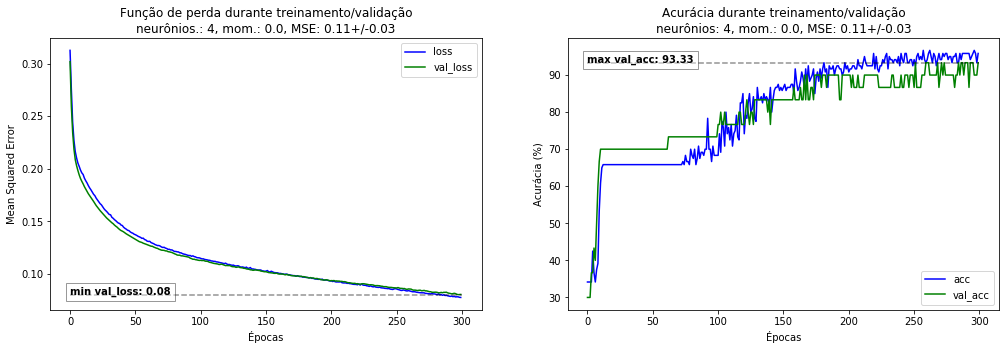

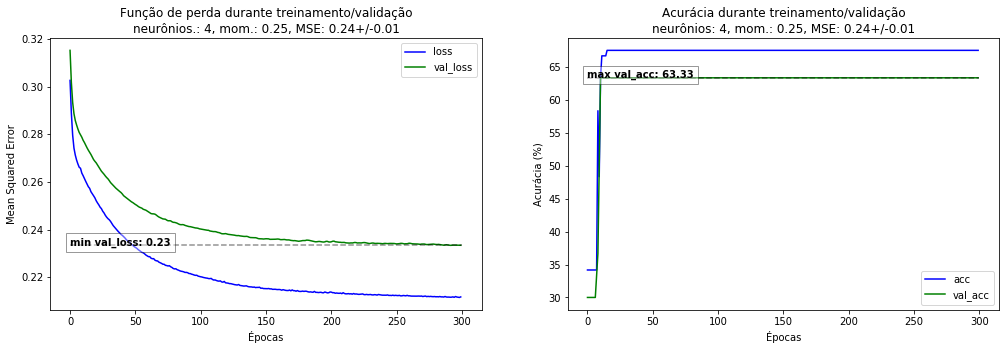

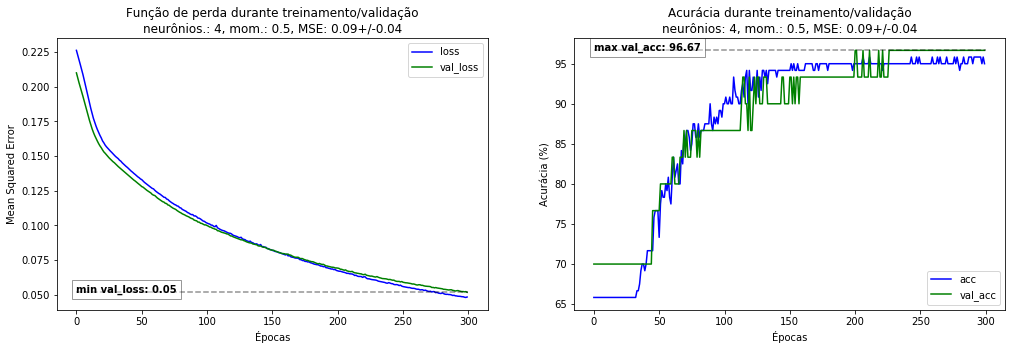

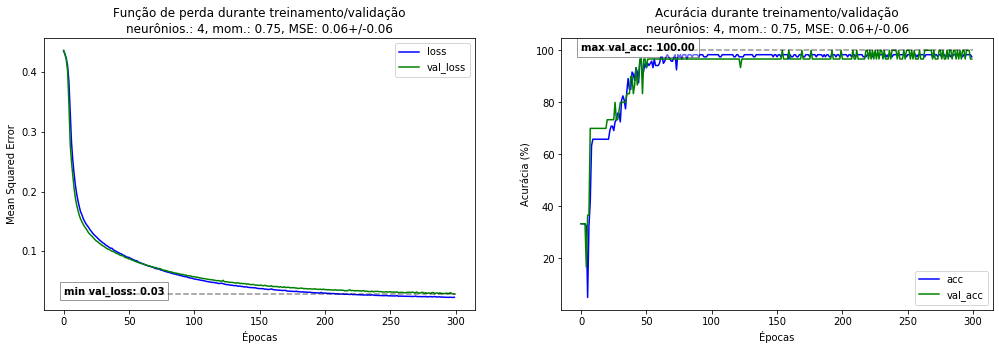

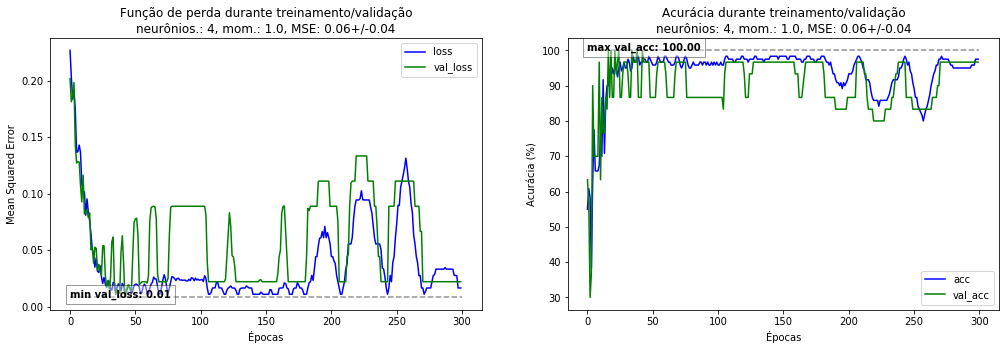

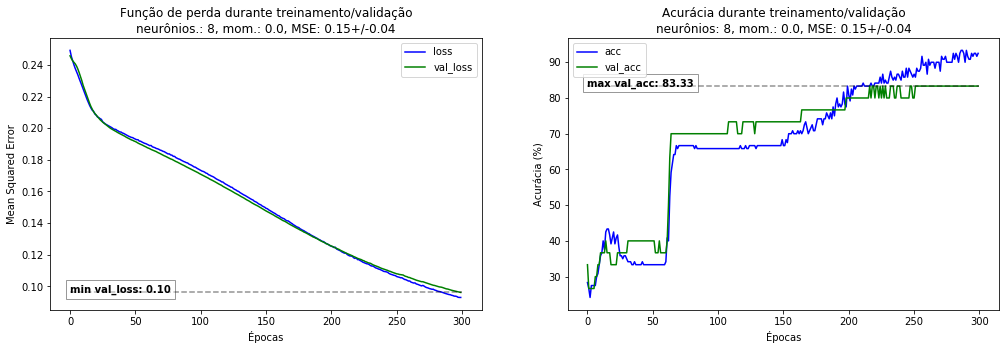

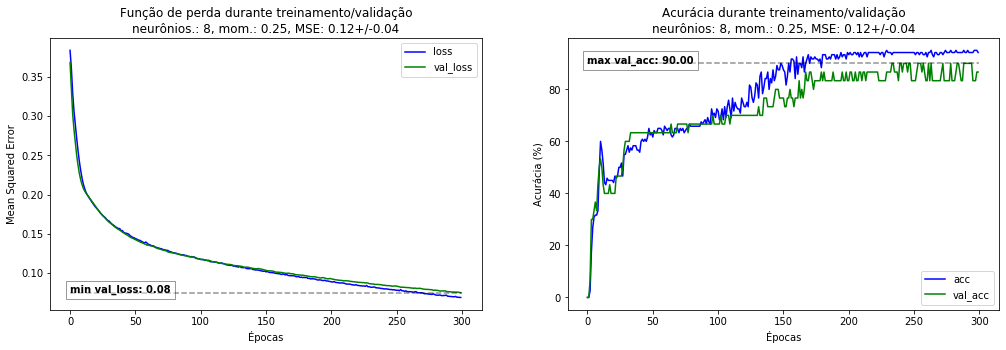

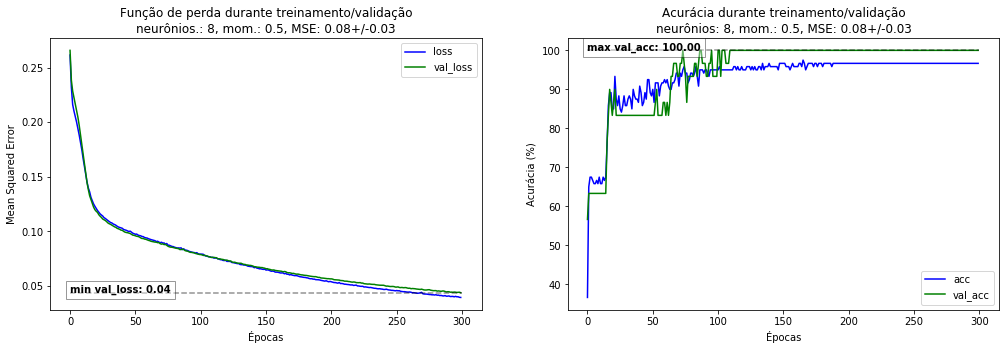

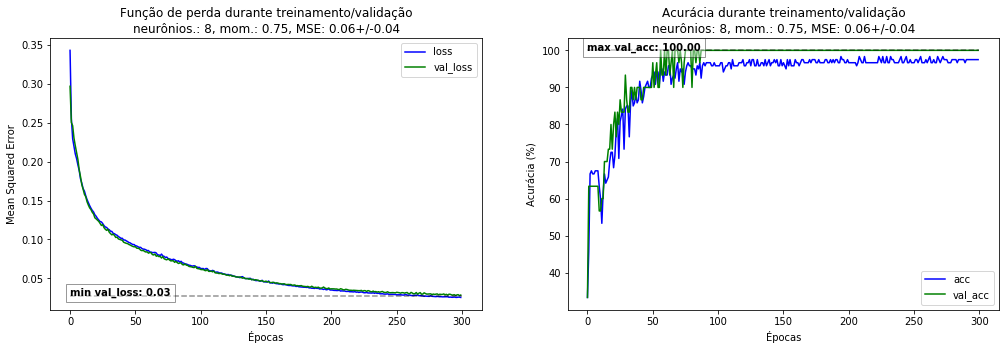

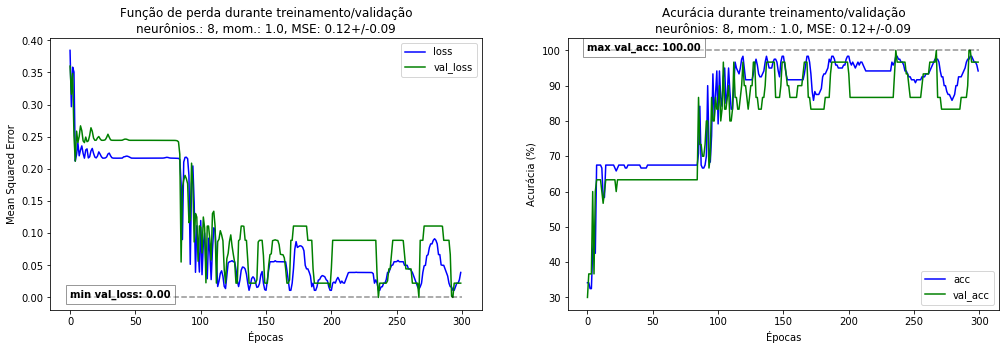

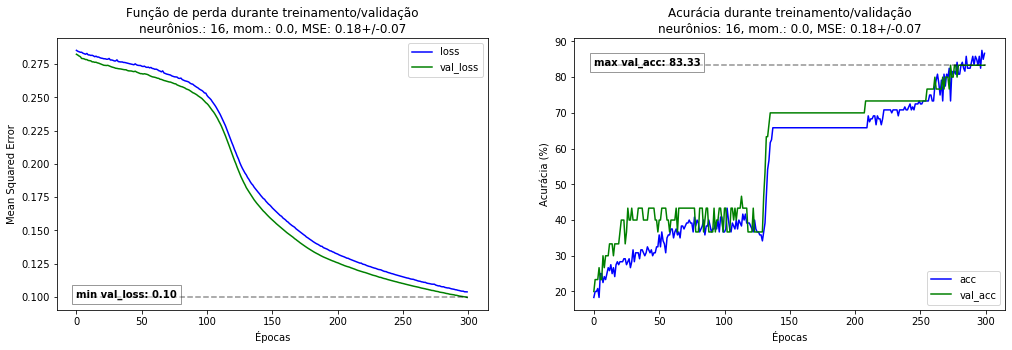

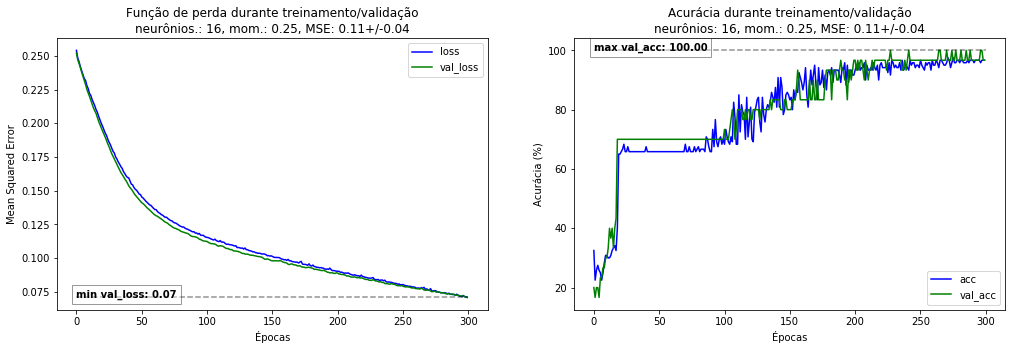

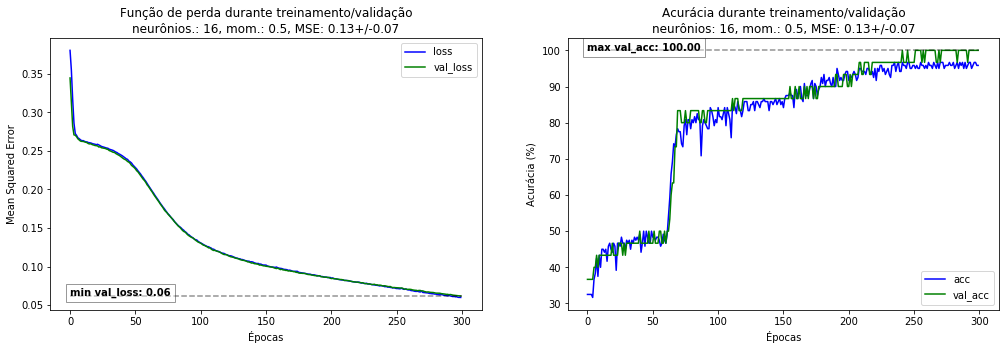

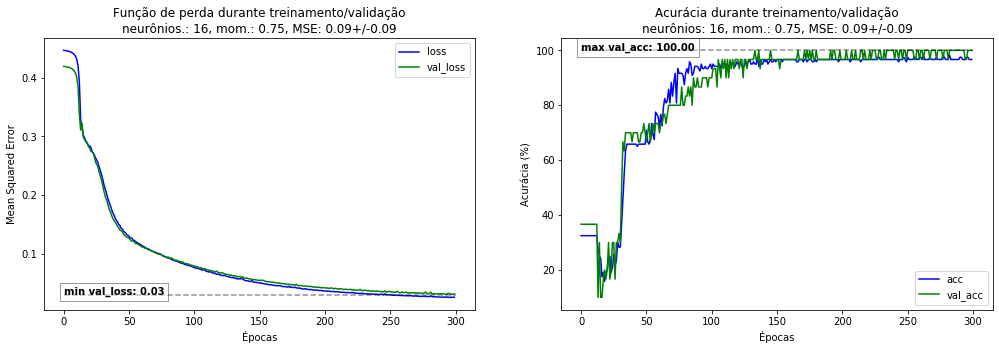

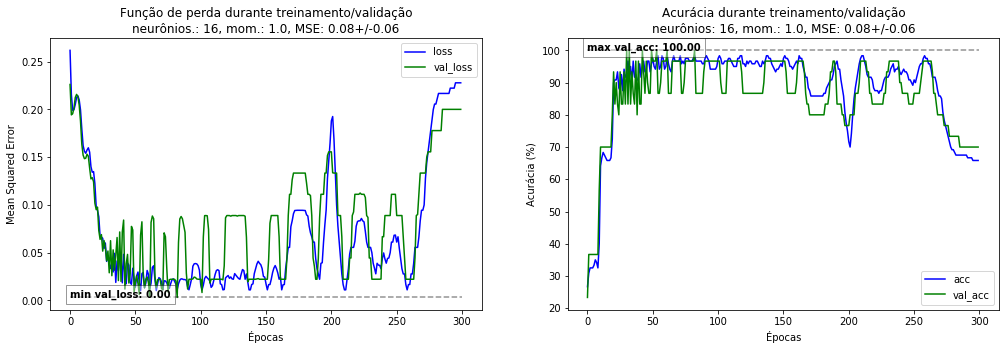

In [7]:
val_mse, mse = dict(), dict()
momentums = [0.0, 0.25, 0.5, 0.75, 1.0]
lr = 0.01
hidden_layers = [4, 8, 16]

for hl in hidden_layers:
    for mom in momentums:
        model = Sequential()
        model.add(Dense(units=16, activation='relu', input_dim=4))
        model.add(Dense(units=3, activation='softmax'))
        opt = optimizers.SGD(lr=lr, momentum=mom)
        model.compile(optimizer=opt, loss='mean_squared_error', metrics=['categorical_accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

        loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
        acc, val_acc = np.array(history.history['categorical_accuracy'])*100, \
                       np.array(history.history['val_categorical_accuracy'])*100
        fig, ax = plt.subplots(1, 2, figsize=(17, 5))
        ax[0].plot(loss, label='loss', color='blue')
        ax[0].plot(val_loss, label='val_loss', color='green')
        ax[0].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
        ax[0].text(0, val_loss.min(), 'min val_loss: %.2f'%val_loss.min(), 
                  fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
        ax[0].legend()
        ax[0].set_title('Função de perda durante treinamento/validação\nneurônios.: %s, mom.: %s, MSE: %.2f+/-%.2f'%(hl, mom, 
                                                                                                  val_loss.mean(), 
                                                                                                 val_loss.std()))
        ax[0].set_xlabel('Épocas')
        ax[0].set_ylabel('Mean Squared Error')
        ax[1].plot(acc, label='acc', color='blue')
        ax[1].plot(val_acc, label='val_acc', color='green')
        ax[1].plot([0, len(val_acc)], [val_acc.max(), val_acc.max()], color='#0000006D', linestyle='--')
        ax[1].text(0, val_acc.max(), 'max val_acc: %.2f'%val_acc.max(), 
                   fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
        ax[1].legend()
        ax[1].set_title('Acurácia durante treinamento/validação\nneurônios: %s, mom.: %s, MSE: %.2f+/-%.2f'%(hl, mom, 
                                                                                                  val_loss.mean(), 
                                                                                                 val_loss.std()))
        ax[1].set_xlabel('Épocas')
        ax[1].set_ylabel('Acurácia (%)')
        print('filename: ', 'results/metrics_001_iris_lr%s_m%s.pdf'%(lr, mom))
        plt.savefig('results/metrics_001_iris_hl%s_lr%s_m%s.pdf'%(hl, lr, mom), dpi=600, bbox_inches='tight', 
                    transparent=False, pad_inches=0.1)
        if not val_mse.get(hl):
            val_mse[hl] = dict(mean=list(), std=list())
        if not mse.get(hl):
            mse[hl] = dict(mean=list(), std=list())
        val_mse[hl]['mean'].append(val_loss.mean())
        mse[hl]['mean'].append(loss.mean())
        val_mse[hl]['std'].append(val_loss.std())
        mse[hl]['std'].append(loss.std())
        

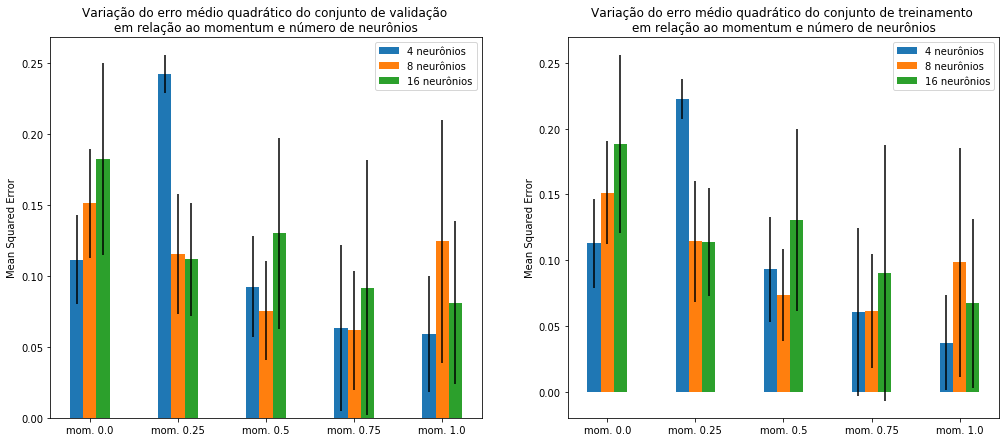

In [8]:
width = .15
x = np.arange(len(momentums))
fig, ax = plt.subplots(1, 2, figsize=(17, 7))
for key in val_mse.keys():
    ax[0].bar(x-width/2, val_mse[key]['mean'], width, yerr=val_mse[key]['std'], 
            label='%s neurônios'%key)
    x = x+width
ax[0].legend()
ax[0].set_xticks(x-(width*2.5))
ax[0].set_xticklabels(['mom. %s'%m for m in momentums] )
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Variação do erro médio quadrático do conjunto de validação \nem relação ao momentum e número de neurônios')

width = .15
x = np.arange(len(momentums))
for key in mse.keys():
    ax[1].bar(x-width/2, mse[key]['mean'], width, yerr=mse[key]['std'], 
            label='%s neurônios'%key)
    x = x+width
ax[1].legend()
ax[1].set_xticks(x-(width*2.5))
ax[1].set_xticklabels(['mom. %s'%m for m in momentums] )
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Variação do erro médio quadrático do conjunto de treinamento \nem relação ao momentum e número de neurônios')
plt.savefig('results/compare_metrics_001.pdf', dpi=600, bbox_inches='tight', 
                    transparent=False, pad_inches=0.1)

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 1ms/step - loss: 0.4321 - categorical_accuracy: 0.3333 - val_loss: 0.4336 - val_categorical_accuracy: 0.3333
Epoch 2/300
120/120 [==============================] - 0s 45us/step - loss: 0.4312 - categorical_accuracy: 0.3333 - val_loss: 0.4326 - val_categorical_accuracy: 0.3333
Epoch 3/300
120/120 [==============================] - 0s 75us/step - loss: 0.4300 - categorical_accuracy: 0.3333 - val_loss: 0.4314 - val_categorical_accuracy: 0.3333
Epoch 4/300
120/120 [==============================] - 0s 61us/step - loss: 0.4286 - categorical_accuracy: 0.3333 - val_loss: 0.4300 - val_categorical_accuracy: 0.3333
Epoch 5/300
120/120 [==============================] - 0s 65us/step - loss: 0.4270 - categorical_accuracy: 0.3333 - val_loss: 0.4284 - val_categorical_accuracy: 0.3333
Epoch 6/300
120/120 [==============================] - 0s 55us/step - loss: 0.4250 - categorical_accuracy: 0.3333 - 

120/120 [==============================] - 0s 59us/step - loss: 0.1656 - categorical_accuracy: 0.7833 - val_loss: 0.1714 - val_categorical_accuracy: 0.7333
Epoch 50/300
120/120 [==============================] - 0s 46us/step - loss: 0.1650 - categorical_accuracy: 0.7500 - val_loss: 0.1706 - val_categorical_accuracy: 0.7333
Epoch 51/300
120/120 [==============================] - 0s 58us/step - loss: 0.1641 - categorical_accuracy: 0.7833 - val_loss: 0.1697 - val_categorical_accuracy: 0.7333
Epoch 52/300
120/120 [==============================] - 0s 54us/step - loss: 0.1635 - categorical_accuracy: 0.8000 - val_loss: 0.1691 - val_categorical_accuracy: 0.7333
Epoch 53/300
120/120 [==============================] - 0s 67us/step - loss: 0.1628 - categorical_accuracy: 0.7750 - val_loss: 0.1684 - val_categorical_accuracy: 0.7333
Epoch 54/300
120/120 [==============================] - 0s 38us/step - loss: 0.1622 - categorical_accuracy: 0.8000 - val_loss: 0.1677 - val_categorical_accuracy: 0.7333

120/120 [==============================] - 0s 49us/step - loss: 0.1446 - categorical_accuracy: 0.8250 - val_loss: 0.1487 - val_categorical_accuracy: 0.7333
Epoch 98/300
120/120 [==============================] - ETA: 0s - loss: 0.1456 - categorical_accuracy: 0.75 - 0s 57us/step - loss: 0.1443 - categorical_accuracy: 0.8250 - val_loss: 0.1485 - val_categorical_accuracy: 0.7333
Epoch 99/300
120/120 [==============================] - 0s 40us/step - loss: 0.1440 - categorical_accuracy: 0.8250 - val_loss: 0.1482 - val_categorical_accuracy: 0.7333
Epoch 100/300
120/120 [==============================] - 0s 53us/step - loss: 0.1437 - categorical_accuracy: 0.8250 - val_loss: 0.1480 - val_categorical_accuracy: 0.7333
Epoch 101/300
120/120 [==============================] - 0s 41us/step - loss: 0.1434 - categorical_accuracy: 0.8250 - val_loss: 0.1476 - val_categorical_accuracy: 0.7333
Epoch 102/300
120/120 [==============================] - 0s 56us/step - loss: 0.1431 - categorical_accuracy: 0.8

Epoch 145/300
120/120 [==============================] - 0s 42us/step - loss: 0.1338 - categorical_accuracy: 0.8417 - val_loss: 0.1377 - val_categorical_accuracy: 0.8000
Epoch 146/300
120/120 [==============================] - 0s 56us/step - loss: 0.1336 - categorical_accuracy: 0.8500 - val_loss: 0.1374 - val_categorical_accuracy: 0.8000
Epoch 147/300
120/120 [==============================] - 0s 42us/step - loss: 0.1335 - categorical_accuracy: 0.8583 - val_loss: 0.1373 - val_categorical_accuracy: 0.8000
Epoch 148/300
120/120 [==============================] - 0s 53us/step - loss: 0.1333 - categorical_accuracy: 0.8500 - val_loss: 0.1372 - val_categorical_accuracy: 0.8000
Epoch 149/300
120/120 [==============================] - 0s 44us/step - loss: 0.1331 - categorical_accuracy: 0.8667 - val_loss: 0.1370 - val_categorical_accuracy: 0.8000
Epoch 150/300
120/120 [==============================] - 0s 54us/step - loss: 0.1329 - categorical_accuracy: 0.8667 - val_loss: 0.1369 - val_categoric

120/120 [==============================] - 0s 39us/step - loss: 0.1264 - categorical_accuracy: 0.8750 - val_loss: 0.1304 - val_categorical_accuracy: 0.8333
Epoch 193/300
120/120 [==============================] - 0s 53us/step - loss: 0.1262 - categorical_accuracy: 0.8750 - val_loss: 0.1303 - val_categorical_accuracy: 0.8333
Epoch 194/300
120/120 [==============================] - 0s 38us/step - loss: 0.1261 - categorical_accuracy: 0.8583 - val_loss: 0.1303 - val_categorical_accuracy: 0.8333
Epoch 195/300
120/120 [==============================] - 0s 56us/step - loss: 0.1260 - categorical_accuracy: 0.8750 - val_loss: 0.1301 - val_categorical_accuracy: 0.8333
Epoch 196/300
120/120 [==============================] - 0s 46us/step - loss: 0.1259 - categorical_accuracy: 0.8583 - val_loss: 0.1300 - val_categorical_accuracy: 0.8333
Epoch 197/300
120/120 [==============================] - 0s 53us/step - loss: 0.1257 - categorical_accuracy: 0.8750 - val_loss: 0.1300 - val_categorical_accuracy: 0

Epoch 240/300
120/120 [==============================] - 0s 45us/step - loss: 0.1202 - categorical_accuracy: 0.8917 - val_loss: 0.1249 - val_categorical_accuracy: 0.8333
Epoch 241/300
120/120 [==============================] - 0s 82us/step - loss: 0.1201 - categorical_accuracy: 0.8917 - val_loss: 0.1248 - val_categorical_accuracy: 0.8333
Epoch 242/300
120/120 [==============================] - 0s 42us/step - loss: 0.1199 - categorical_accuracy: 0.8917 - val_loss: 0.1246 - val_categorical_accuracy: 0.8333
Epoch 243/300
120/120 [==============================] - 0s 63us/step - loss: 0.1198 - categorical_accuracy: 0.8917 - val_loss: 0.1244 - val_categorical_accuracy: 0.8333
Epoch 244/300
120/120 [==============================] - 0s 40us/step - loss: 0.1197 - categorical_accuracy: 0.9000 - val_loss: 0.1244 - val_categorical_accuracy: 0.8333
Epoch 245/300
120/120 [==============================] - 0s 51us/step - loss: 0.1196 - categorical_accuracy: 0.9000 - val_loss: 0.1243 - val_categoric

Epoch 288/300
120/120 [==============================] - 0s 48us/step - loss: 0.1147 - categorical_accuracy: 0.9167 - val_loss: 0.1202 - val_categorical_accuracy: 0.8333
Epoch 289/300
120/120 [==============================] - 0s 61us/step - loss: 0.1146 - categorical_accuracy: 0.9167 - val_loss: 0.1201 - val_categorical_accuracy: 0.8333
Epoch 290/300
120/120 [==============================] - 0s 50us/step - loss: 0.1145 - categorical_accuracy: 0.9167 - val_loss: 0.1200 - val_categorical_accuracy: 0.8333
Epoch 291/300
120/120 [==============================] - 0s 59us/step - loss: 0.1144 - categorical_accuracy: 0.9167 - val_loss: 0.1198 - val_categorical_accuracy: 0.8333
Epoch 292/300
120/120 [==============================] - 0s 48us/step - loss: 0.1143 - categorical_accuracy: 0.9167 - val_loss: 0.1197 - val_categorical_accuracy: 0.8333
Epoch 293/300
120/120 [==============================] - 0s 44us/step - loss: 0.1142 - categorical_accuracy: 0.9167 - val_loss: 0.1196 - val_categoric

120/120 [==============================] - 0s 55us/step - loss: 0.2513 - categorical_accuracy: 0.3417 - val_loss: 0.2513 - val_categorical_accuracy: 0.3000
Epoch 37/300
120/120 [==============================] - 0s 58us/step - loss: 0.2512 - categorical_accuracy: 0.3417 - val_loss: 0.2512 - val_categorical_accuracy: 0.3000
Epoch 38/300
120/120 [==============================] - 0s 53us/step - loss: 0.2511 - categorical_accuracy: 0.3417 - val_loss: 0.2511 - val_categorical_accuracy: 0.3000
Epoch 39/300
120/120 [==============================] - 0s 59us/step - loss: 0.2510 - categorical_accuracy: 0.3417 - val_loss: 0.2510 - val_categorical_accuracy: 0.3000
Epoch 40/300
120/120 [==============================] - 0s 55us/step - loss: 0.2509 - categorical_accuracy: 0.3417 - val_loss: 0.2509 - val_categorical_accuracy: 0.3000
Epoch 41/300
120/120 [==============================] - 0s 55us/step - loss: 0.2509 - categorical_accuracy: 0.3417 - val_loss: 0.2509 - val_categorical_accuracy: 0.3000

120/120 [==============================] - 0s 60us/step - loss: 0.2472 - categorical_accuracy: 0.3417 - val_loss: 0.2473 - val_categorical_accuracy: 0.3000
Epoch 85/300
120/120 [==============================] - 0s 53us/step - loss: 0.2471 - categorical_accuracy: 0.3417 - val_loss: 0.2472 - val_categorical_accuracy: 0.3000
Epoch 86/300
120/120 [==============================] - 0s 66us/step - loss: 0.2470 - categorical_accuracy: 0.3417 - val_loss: 0.2471 - val_categorical_accuracy: 0.3000
Epoch 87/300
120/120 [==============================] - 0s 36us/step - loss: 0.2469 - categorical_accuracy: 0.3417 - val_loss: 0.2470 - val_categorical_accuracy: 0.3000
Epoch 88/300
120/120 [==============================] - 0s 55us/step - loss: 0.2468 - categorical_accuracy: 0.3417 - val_loss: 0.2469 - val_categorical_accuracy: 0.3000
Epoch 89/300
120/120 [==============================] - 0s 60us/step - loss: 0.2468 - categorical_accuracy: 0.3417 - val_loss: 0.2469 - val_categorical_accuracy: 0.3000

120/120 [==============================] - 0s 67us/step - loss: 0.2436 - categorical_accuracy: 0.3417 - val_loss: 0.2438 - val_categorical_accuracy: 0.3000
Epoch 133/300
120/120 [==============================] - 0s 44us/step - loss: 0.2435 - categorical_accuracy: 0.3417 - val_loss: 0.2437 - val_categorical_accuracy: 0.3000
Epoch 134/300
120/120 [==============================] - 0s 53us/step - loss: 0.2435 - categorical_accuracy: 0.3417 - val_loss: 0.2436 - val_categorical_accuracy: 0.3000
Epoch 135/300
120/120 [==============================] - 0s 54us/step - loss: 0.2434 - categorical_accuracy: 0.3417 - val_loss: 0.2436 - val_categorical_accuracy: 0.3000
Epoch 136/300
120/120 [==============================] - 0s 62us/step - loss: 0.2433 - categorical_accuracy: 0.3417 - val_loss: 0.2435 - val_categorical_accuracy: 0.3000
Epoch 137/300
120/120 [==============================] - 0s 43us/step - loss: 0.2433 - categorical_accuracy: 0.3417 - val_loss: 0.2434 - val_categorical_accuracy: 0

Epoch 180/300
120/120 [==============================] - 0s 66us/step - loss: 0.2405 - categorical_accuracy: 0.3417 - val_loss: 0.2408 - val_categorical_accuracy: 0.3000
Epoch 181/300
120/120 [==============================] - 0s 55us/step - loss: 0.2405 - categorical_accuracy: 0.3417 - val_loss: 0.2407 - val_categorical_accuracy: 0.3000
Epoch 182/300
120/120 [==============================] - 0s 56us/step - loss: 0.2404 - categorical_accuracy: 0.3417 - val_loss: 0.2407 - val_categorical_accuracy: 0.3000
Epoch 183/300
120/120 [==============================] - 0s 45us/step - loss: 0.2404 - categorical_accuracy: 0.3417 - val_loss: 0.2406 - val_categorical_accuracy: 0.3000
Epoch 184/300
120/120 [==============================] - 0s 73us/step - loss: 0.2403 - categorical_accuracy: 0.3417 - val_loss: 0.2406 - val_categorical_accuracy: 0.3000
Epoch 185/300
120/120 [==============================] - 0s 64us/step - loss: 0.2402 - categorical_accuracy: 0.3417 - val_loss: 0.2405 - val_categoric

120/120 [==============================] - 0s 72us/step - loss: 0.2379 - categorical_accuracy: 0.3417 - val_loss: 0.2382 - val_categorical_accuracy: 0.3000
Epoch 229/300
120/120 [==============================] - 0s 71us/step - loss: 0.2379 - categorical_accuracy: 0.3417 - val_loss: 0.2382 - val_categorical_accuracy: 0.3000
Epoch 230/300
120/120 [==============================] - 0s 73us/step - loss: 0.2378 - categorical_accuracy: 0.3417 - val_loss: 0.2381 - val_categorical_accuracy: 0.3000
Epoch 231/300
120/120 [==============================] - 0s 67us/step - loss: 0.2378 - categorical_accuracy: 0.3417 - val_loss: 0.2381 - val_categorical_accuracy: 0.3000
Epoch 232/300
120/120 [==============================] - 0s 40us/step - loss: 0.2377 - categorical_accuracy: 0.3417 - val_loss: 0.2380 - val_categorical_accuracy: 0.3000
Epoch 233/300
120/120 [==============================] - 0s 62us/step - loss: 0.2377 - categorical_accuracy: 0.3417 - val_loss: 0.2380 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 47us/step - loss: 0.2357 - categorical_accuracy: 0.3417 - val_loss: 0.2360 - val_categorical_accuracy: 0.3000
Epoch 277/300
120/120 [==============================] - 0s 53us/step - loss: 0.2356 - categorical_accuracy: 0.3417 - val_loss: 0.2360 - val_categorical_accuracy: 0.3000
Epoch 278/300
120/120 [==============================] - 0s 37us/step - loss: 0.2356 - categorical_accuracy: 0.3417 - val_loss: 0.2359 - val_categorical_accuracy: 0.3000
Epoch 279/300
120/120 [==============================] - 0s 51us/step - loss: 0.2355 - categorical_accuracy: 0.3417 - val_loss: 0.2359 - val_categorical_accuracy: 0.3000
Epoch 280/300
120/120 [==============================] - 0s 44us/step - loss: 0.2355 - categorical_accuracy: 0.3417 - val_loss: 0.2358 - val_categorical_accuracy: 0.3000
Epoch 281/300
120/120 [==============================] - 0s 67us/step - loss: 0.2355 - categorical_accuracy: 0.3417 - val_loss: 0.2358 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 48us/step - loss: 0.2315 - categorical_accuracy: 0.6583 - val_loss: 0.2138 - val_categorical_accuracy: 0.7000
Epoch 25/300
120/120 [==============================] - 0s 56us/step - loss: 0.2301 - categorical_accuracy: 0.6583 - val_loss: 0.2124 - val_categorical_accuracy: 0.7000
Epoch 26/300
120/120 [==============================] - 0s 62us/step - loss: 0.2287 - categorical_accuracy: 0.6583 - val_loss: 0.2110 - val_categorical_accuracy: 0.7000
Epoch 27/300
120/120 [==============================] - 0s 80us/step - loss: 0.2272 - categorical_accuracy: 0.6583 - val_loss: 0.2095 - val_categorical_accuracy: 0.7000
Epoch 28/300
120/120 [==============================] - 0s 44us/step - loss: 0.2259 - categorical_accuracy: 0.6583 - val_loss: 0.2082 - val_categorical_accuracy: 0.7000
Epoch 29/300
120/120 [==============================] - 0s 72us/step - loss: 0.2247 - categorical_accuracy: 0.6583 - val_loss: 0.2070 - val_categorical_accuracy: 0.7000

120/120 [==============================] - 0s 42us/step - loss: 0.1951 - categorical_accuracy: 0.6583 - val_loss: 0.1771 - val_categorical_accuracy: 0.7000
Epoch 73/300
120/120 [==============================] - 0s 55us/step - loss: 0.1949 - categorical_accuracy: 0.6583 - val_loss: 0.1768 - val_categorical_accuracy: 0.7000
Epoch 74/300
120/120 [==============================] - 0s 38us/step - loss: 0.1945 - categorical_accuracy: 0.6583 - val_loss: 0.1765 - val_categorical_accuracy: 0.7000
Epoch 75/300
120/120 [==============================] - 0s 54us/step - loss: 0.1943 - categorical_accuracy: 0.6583 - val_loss: 0.1762 - val_categorical_accuracy: 0.7000
Epoch 76/300
120/120 [==============================] - 0s 53us/step - loss: 0.1939 - categorical_accuracy: 0.6583 - val_loss: 0.1759 - val_categorical_accuracy: 0.7000
Epoch 77/300
120/120 [==============================] - 0s 57us/step - loss: 0.1936 - categorical_accuracy: 0.6583 - val_loss: 0.1756 - val_categorical_accuracy: 0.7000

Epoch 120/300
120/120 [==============================] - 0s 43us/step - loss: 0.1869 - categorical_accuracy: 0.6583 - val_loss: 0.1689 - val_categorical_accuracy: 0.7000
Epoch 121/300
120/120 [==============================] - 0s 56us/step - loss: 0.1868 - categorical_accuracy: 0.6583 - val_loss: 0.1688 - val_categorical_accuracy: 0.7000
Epoch 122/300
120/120 [==============================] - 0s 47us/step - loss: 0.1867 - categorical_accuracy: 0.6583 - val_loss: 0.1687 - val_categorical_accuracy: 0.7000
Epoch 123/300
120/120 [==============================] - 0s 62us/step - loss: 0.1867 - categorical_accuracy: 0.6583 - val_loss: 0.1686 - val_categorical_accuracy: 0.7000
Epoch 124/300
120/120 [==============================] - 0s 42us/step - loss: 0.1865 - categorical_accuracy: 0.6583 - val_loss: 0.1685 - val_categorical_accuracy: 0.7000
Epoch 125/300
120/120 [==============================] - 0s 54us/step - loss: 0.1865 - categorical_accuracy: 0.6583 - val_loss: 0.1684 - val_categoric

120/120 [==============================] - 0s 68us/step - loss: 0.1839 - categorical_accuracy: 0.6583 - val_loss: 0.1660 - val_categorical_accuracy: 0.7000
Epoch 169/300
120/120 [==============================] - 0s 39us/step - loss: 0.1839 - categorical_accuracy: 0.6583 - val_loss: 0.1659 - val_categorical_accuracy: 0.7000
Epoch 170/300
120/120 [==============================] - 0s 57us/step - loss: 0.1838 - categorical_accuracy: 0.6583 - val_loss: 0.1659 - val_categorical_accuracy: 0.7000
Epoch 171/300
120/120 [==============================] - 0s 45us/step - loss: 0.1837 - categorical_accuracy: 0.6583 - val_loss: 0.1659 - val_categorical_accuracy: 0.7000
Epoch 172/300
120/120 [==============================] - 0s 60us/step - loss: 0.1837 - categorical_accuracy: 0.6583 - val_loss: 0.1658 - val_categorical_accuracy: 0.7000
Epoch 173/300
120/120 [==============================] - 0s 41us/step - loss: 0.1837 - categorical_accuracy: 0.6583 - val_loss: 0.1658 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 59us/step - loss: 0.1823 - categorical_accuracy: 0.6583 - val_loss: 0.1645 - val_categorical_accuracy: 0.7000
Epoch 216/300
120/120 [==============================] - 0s 53us/step - loss: 0.1822 - categorical_accuracy: 0.6583 - val_loss: 0.1645 - val_categorical_accuracy: 0.7000
Epoch 217/300
120/120 [==============================] - 0s 52us/step - loss: 0.1822 - categorical_accuracy: 0.6583 - val_loss: 0.1645 - val_categorical_accuracy: 0.7000
Epoch 218/300
120/120 [==============================] - 0s 57us/step - loss: 0.1822 - categorical_accuracy: 0.6583 - val_loss: 0.1645 - val_categorical_accuracy: 0.7000
Epoch 219/300
120/120 [==============================] - 0s 43us/step - loss: 0.1822 - categorical_accuracy: 0.6583 - val_loss: 0.1644 - val_categorical_accuracy: 0.7000
Epoch 220/300
120/120 [==============================] - 0s 55us/step - loss: 0.1821 - categorical_accuracy: 0.6583 - val_loss: 0.1644 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 61us/step - loss: 0.1812 - categorical_accuracy: 0.6583 - val_loss: 0.1635 - val_categorical_accuracy: 0.7000
Epoch 264/300
120/120 [==============================] - 0s 40us/step - loss: 0.1812 - categorical_accuracy: 0.6583 - val_loss: 0.1635 - val_categorical_accuracy: 0.7000
Epoch 265/300
120/120 [==============================] - 0s 52us/step - loss: 0.1811 - categorical_accuracy: 0.6583 - val_loss: 0.1635 - val_categorical_accuracy: 0.7000
Epoch 266/300
120/120 [==============================] - 0s 51us/step - loss: 0.1811 - categorical_accuracy: 0.6583 - val_loss: 0.1635 - val_categorical_accuracy: 0.7000
Epoch 267/300
120/120 [==============================] - 0s 48us/step - loss: 0.1811 - categorical_accuracy: 0.6583 - val_loss: 0.1635 - val_categorical_accuracy: 0.7000
Epoch 268/300
120/120 [==============================] - 0s 49us/step - loss: 0.1811 - categorical_accuracy: 0.6583 - val_loss: 0.1635 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 37us/step - loss: 0.2668 - categorical_accuracy: 0.2750 - val_loss: 0.2666 - val_categorical_accuracy: 0.2667
Epoch 12/300
120/120 [==============================] - 0s 45us/step - loss: 0.2666 - categorical_accuracy: 0.2750 - val_loss: 0.2664 - val_categorical_accuracy: 0.2667
Epoch 13/300
120/120 [==============================] - 0s 34us/step - loss: 0.2665 - categorical_accuracy: 0.2833 - val_loss: 0.2663 - val_categorical_accuracy: 0.2667
Epoch 14/300
120/120 [==============================] - 0s 38us/step - loss: 0.2663 - categorical_accuracy: 0.2833 - val_loss: 0.2661 - val_categorical_accuracy: 0.2667
Epoch 15/300
120/120 [==============================] - 0s 50us/step - loss: 0.2662 - categorical_accuracy: 0.2833 - val_loss: 0.2660 - val_categorical_accuracy: 0.3000
Epoch 16/300
120/120 [==============================] - 0s 40us/step - loss: 0.2660 - categorical_accuracy: 0.2917 - val_loss: 0.2658 - val_categorical_accuracy: 0.2667

120/120 [==============================] - 0s 39us/step - loss: 0.2602 - categorical_accuracy: 0.3417 - val_loss: 0.2602 - val_categorical_accuracy: 0.3000
Epoch 60/300
120/120 [==============================] - 0s 44us/step - loss: 0.2601 - categorical_accuracy: 0.3417 - val_loss: 0.2601 - val_categorical_accuracy: 0.3000
Epoch 61/300
120/120 [==============================] - 0s 39us/step - loss: 0.2600 - categorical_accuracy: 0.3417 - val_loss: 0.2600 - val_categorical_accuracy: 0.3000
Epoch 62/300
120/120 [==============================] - 0s 39us/step - loss: 0.2598 - categorical_accuracy: 0.3417 - val_loss: 0.2598 - val_categorical_accuracy: 0.3000
Epoch 63/300
120/120 [==============================] - 0s 39us/step - loss: 0.2597 - categorical_accuracy: 0.3417 - val_loss: 0.2597 - val_categorical_accuracy: 0.3000
Epoch 64/300
120/120 [==============================] - 0s 39us/step - loss: 0.2596 - categorical_accuracy: 0.3417 - val_loss: 0.2596 - val_categorical_accuracy: 0.3000

120/120 [==============================] - 0s 37us/step - loss: 0.2548 - categorical_accuracy: 0.3417 - val_loss: 0.2549 - val_categorical_accuracy: 0.3000
Epoch 108/300
120/120 [==============================] - 0s 41us/step - loss: 0.2547 - categorical_accuracy: 0.3417 - val_loss: 0.2548 - val_categorical_accuracy: 0.3000
Epoch 109/300
120/120 [==============================] - 0s 40us/step - loss: 0.2546 - categorical_accuracy: 0.3417 - val_loss: 0.2547 - val_categorical_accuracy: 0.3000
Epoch 110/300
120/120 [==============================] - 0s 38us/step - loss: 0.2544 - categorical_accuracy: 0.3417 - val_loss: 0.2546 - val_categorical_accuracy: 0.3000
Epoch 111/300
120/120 [==============================] - 0s 37us/step - loss: 0.2544 - categorical_accuracy: 0.3417 - val_loss: 0.2545 - val_categorical_accuracy: 0.3000
Epoch 112/300
120/120 [==============================] - 0s 41us/step - loss: 0.2542 - categorical_accuracy: 0.3417 - val_loss: 0.2544 - val_categorical_accuracy: 0

Epoch 155/300
120/120 [==============================] - 0s 40us/step - loss: 0.2501 - categorical_accuracy: 0.3417 - val_loss: 0.2503 - val_categorical_accuracy: 0.3000
Epoch 156/300
120/120 [==============================] - 0s 37us/step - loss: 0.2500 - categorical_accuracy: 0.3417 - val_loss: 0.2502 - val_categorical_accuracy: 0.3000
Epoch 157/300
120/120 [==============================] - 0s 40us/step - loss: 0.2499 - categorical_accuracy: 0.3417 - val_loss: 0.2501 - val_categorical_accuracy: 0.3000
Epoch 158/300
120/120 [==============================] - 0s 40us/step - loss: 0.2498 - categorical_accuracy: 0.3417 - val_loss: 0.2501 - val_categorical_accuracy: 0.3000
Epoch 159/300
120/120 [==============================] - 0s 37us/step - loss: 0.2498 - categorical_accuracy: 0.3417 - val_loss: 0.2500 - val_categorical_accuracy: 0.3000
Epoch 160/300
120/120 [==============================] - 0s 36us/step - loss: 0.2497 - categorical_accuracy: 0.3417 - val_loss: 0.2499 - val_categoric

Epoch 203/300
120/120 [==============================] - 0s 39us/step - loss: 0.2461 - categorical_accuracy: 0.3417 - val_loss: 0.2464 - val_categorical_accuracy: 0.3000
Epoch 204/300
120/120 [==============================] - 0s 39us/step - loss: 0.2461 - categorical_accuracy: 0.3417 - val_loss: 0.2463 - val_categorical_accuracy: 0.3000
Epoch 205/300
120/120 [==============================] - 0s 41us/step - loss: 0.2460 - categorical_accuracy: 0.3417 - val_loss: 0.2462 - val_categorical_accuracy: 0.3000
Epoch 206/300
120/120 [==============================] - 0s 40us/step - loss: 0.2459 - categorical_accuracy: 0.3417 - val_loss: 0.2462 - val_categorical_accuracy: 0.3000
Epoch 207/300
120/120 [==============================] - 0s 42us/step - loss: 0.2458 - categorical_accuracy: 0.3417 - val_loss: 0.2461 - val_categorical_accuracy: 0.3000
Epoch 208/300
120/120 [==============================] - 0s 40us/step - loss: 0.2458 - categorical_accuracy: 0.3417 - val_loss: 0.2460 - val_categoric

120/120 [==============================] - 0s 37us/step - loss: 0.2428 - categorical_accuracy: 0.3417 - val_loss: 0.2431 - val_categorical_accuracy: 0.3000
Epoch 251/300
120/120 [==============================] - 0s 38us/step - loss: 0.2427 - categorical_accuracy: 0.3417 - val_loss: 0.2430 - val_categorical_accuracy: 0.3000
Epoch 252/300
120/120 [==============================] - 0s 36us/step - loss: 0.2427 - categorical_accuracy: 0.3417 - val_loss: 0.2429 - val_categorical_accuracy: 0.3000
Epoch 253/300
120/120 [==============================] - 0s 37us/step - loss: 0.2426 - categorical_accuracy: 0.3417 - val_loss: 0.2429 - val_categorical_accuracy: 0.3000
Epoch 254/300
120/120 [==============================] - 0s 39us/step - loss: 0.2425 - categorical_accuracy: 0.3417 - val_loss: 0.2428 - val_categorical_accuracy: 0.3000
Epoch 255/300
120/120 [==============================] - 0s 37us/step - loss: 0.2425 - categorical_accuracy: 0.3417 - val_loss: 0.2427 - val_categorical_accuracy: 0

Epoch 298/300
120/120 [==============================] - 0s 38us/step - loss: 0.2398 - categorical_accuracy: 0.3417 - val_loss: 0.2402 - val_categorical_accuracy: 0.3000
Epoch 299/300
120/120 [==============================] - 0s 47us/step - loss: 0.2398 - categorical_accuracy: 0.3417 - val_loss: 0.2401 - val_categorical_accuracy: 0.3000
Epoch 300/300
120/120 [==============================] - 0s 41us/step - loss: 0.2397 - categorical_accuracy: 0.3417 - val_loss: 0.2400 - val_categorical_accuracy: 0.3000
Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 1ms/step - loss: 0.1895 - categorical_accuracy: 0.7500 - val_loss: 0.1842 - val_categorical_accuracy: 0.9333
Epoch 2/300
120/120 [==============================] - 0s 45us/step - loss: 0.1850 - categorical_accuracy: 0.9250 - val_loss: 0.1798 - val_categorical_accuracy: 0.9667
Epoch 3/300
120/120 [==============================] - 0s 39us/step - loss: 0.1811 - categorical_accuracy: 0.9

120/120 [==============================] - 0s 41us/step - loss: 0.1204 - categorical_accuracy: 0.8000 - val_loss: 0.1158 - val_categorical_accuracy: 0.8333
Epoch 47/300
120/120 [==============================] - 0s 43us/step - loss: 0.1195 - categorical_accuracy: 0.8000 - val_loss: 0.1150 - val_categorical_accuracy: 0.8333
Epoch 48/300
120/120 [==============================] - 0s 37us/step - loss: 0.1187 - categorical_accuracy: 0.8083 - val_loss: 0.1143 - val_categorical_accuracy: 0.8333
Epoch 49/300
120/120 [==============================] - 0s 38us/step - loss: 0.1183 - categorical_accuracy: 0.8000 - val_loss: 0.1134 - val_categorical_accuracy: 0.8333
Epoch 50/300
120/120 [==============================] - 0s 38us/step - loss: 0.1172 - categorical_accuracy: 0.8083 - val_loss: 0.1128 - val_categorical_accuracy: 0.8333
Epoch 51/300
120/120 [==============================] - 0s 43us/step - loss: 0.1164 - categorical_accuracy: 0.8417 - val_loss: 0.1123 - val_categorical_accuracy: 0.8333

Epoch 94/300
120/120 [==============================] - 0s 39us/step - loss: 0.0930 - categorical_accuracy: 0.9333 - val_loss: 0.0906 - val_categorical_accuracy: 0.9667
Epoch 95/300
120/120 [==============================] - 0s 39us/step - loss: 0.0927 - categorical_accuracy: 0.9333 - val_loss: 0.0903 - val_categorical_accuracy: 0.9667
Epoch 96/300
120/120 [==============================] - 0s 37us/step - loss: 0.0923 - categorical_accuracy: 0.9333 - val_loss: 0.0899 - val_categorical_accuracy: 0.9667
Epoch 97/300
120/120 [==============================] - 0s 39us/step - loss: 0.0919 - categorical_accuracy: 0.9333 - val_loss: 0.0893 - val_categorical_accuracy: 0.9000
Epoch 98/300
120/120 [==============================] - 0s 40us/step - loss: 0.0917 - categorical_accuracy: 0.9083 - val_loss: 0.0888 - val_categorical_accuracy: 0.8667
Epoch 99/300
120/120 [==============================] - 0s 39us/step - loss: 0.0909 - categorical_accuracy: 0.9333 - val_loss: 0.0887 - val_categorical_acc

Epoch 142/300
120/120 [==============================] - 0s 41us/step - loss: 0.0761 - categorical_accuracy: 0.9500 - val_loss: 0.0757 - val_categorical_accuracy: 1.0000
Epoch 143/300
120/120 [==============================] - 0s 41us/step - loss: 0.0758 - categorical_accuracy: 0.9500 - val_loss: 0.0754 - val_categorical_accuracy: 1.0000
Epoch 144/300
120/120 [==============================] - 0s 40us/step - loss: 0.0755 - categorical_accuracy: 0.9500 - val_loss: 0.0750 - val_categorical_accuracy: 1.0000
Epoch 145/300
120/120 [==============================] - 0s 37us/step - loss: 0.0753 - categorical_accuracy: 0.9500 - val_loss: 0.0748 - val_categorical_accuracy: 1.0000
Epoch 146/300
120/120 [==============================] - 0s 40us/step - loss: 0.0749 - categorical_accuracy: 0.9500 - val_loss: 0.0745 - val_categorical_accuracy: 1.0000
Epoch 147/300
120/120 [==============================] - 0s 37us/step - loss: 0.0748 - categorical_accuracy: 0.9500 - val_loss: 0.0741 - val_categoric

120/120 [==============================] - 0s 37us/step - loss: 0.0633 - categorical_accuracy: 0.9667 - val_loss: 0.0643 - val_categorical_accuracy: 1.0000
Epoch 191/300
120/120 [==============================] - 0s 56us/step - loss: 0.0631 - categorical_accuracy: 0.9583 - val_loss: 0.0641 - val_categorical_accuracy: 1.0000
Epoch 192/300
120/120 [==============================] - 0s 42us/step - loss: 0.0629 - categorical_accuracy: 0.9667 - val_loss: 0.0639 - val_categorical_accuracy: 1.0000
Epoch 193/300
120/120 [==============================] - 0s 43us/step - loss: 0.0626 - categorical_accuracy: 0.9583 - val_loss: 0.0635 - val_categorical_accuracy: 1.0000
Epoch 194/300
120/120 [==============================] - 0s 40us/step - loss: 0.0625 - categorical_accuracy: 0.9583 - val_loss: 0.0634 - val_categorical_accuracy: 1.0000
Epoch 195/300
120/120 [==============================] - 0s 41us/step - loss: 0.0621 - categorical_accuracy: 0.9583 - val_loss: 0.0631 - val_categorical_accuracy: 1

120/120 [==============================] - 0s 42us/step - loss: 0.0534 - categorical_accuracy: 0.9583 - val_loss: 0.0555 - val_categorical_accuracy: 1.0000
Epoch 238/300
120/120 [==============================] - 0s 40us/step - loss: 0.0533 - categorical_accuracy: 0.9667 - val_loss: 0.0555 - val_categorical_accuracy: 1.0000
Epoch 239/300
120/120 [==============================] - 0s 39us/step - loss: 0.0532 - categorical_accuracy: 0.9667 - val_loss: 0.0555 - val_categorical_accuracy: 1.0000
Epoch 240/300
120/120 [==============================] - 0s 39us/step - loss: 0.0531 - categorical_accuracy: 0.9667 - val_loss: 0.0553 - val_categorical_accuracy: 1.0000
Epoch 241/300
120/120 [==============================] - 0s 42us/step - loss: 0.0528 - categorical_accuracy: 0.9667 - val_loss: 0.0552 - val_categorical_accuracy: 1.0000
Epoch 242/300
120/120 [==============================] - 0s 38us/step - loss: 0.0526 - categorical_accuracy: 0.9667 - val_loss: 0.0549 - val_categorical_accuracy: 1

Epoch 285/300
120/120 [==============================] - 0s 38us/step - loss: 0.0459 - categorical_accuracy: 0.9667 - val_loss: 0.0492 - val_categorical_accuracy: 1.0000
Epoch 286/300
120/120 [==============================] - 0s 38us/step - loss: 0.0458 - categorical_accuracy: 0.9667 - val_loss: 0.0492 - val_categorical_accuracy: 1.0000
Epoch 287/300
120/120 [==============================] - 0s 39us/step - loss: 0.0456 - categorical_accuracy: 0.9667 - val_loss: 0.0488 - val_categorical_accuracy: 1.0000
Epoch 288/300
120/120 [==============================] - 0s 38us/step - loss: 0.0455 - categorical_accuracy: 0.9667 - val_loss: 0.0486 - val_categorical_accuracy: 1.0000
Epoch 289/300
120/120 [==============================] - 0s 38us/step - loss: 0.0452 - categorical_accuracy: 0.9667 - val_loss: 0.0486 - val_categorical_accuracy: 1.0000
Epoch 290/300
120/120 [==============================] - 0s 38us/step - loss: 0.0454 - categorical_accuracy: 0.9667 - val_loss: 0.0486 - val_categoric

120/120 [==============================] - 0s 38us/step - loss: 0.2610 - categorical_accuracy: 0.6750 - val_loss: 0.2605 - val_categorical_accuracy: 0.6333
Epoch 34/300
120/120 [==============================] - 0s 41us/step - loss: 0.2606 - categorical_accuracy: 0.6750 - val_loss: 0.2604 - val_categorical_accuracy: 0.6333
Epoch 35/300
120/120 [==============================] - 0s 42us/step - loss: 0.2606 - categorical_accuracy: 0.6750 - val_loss: 0.2603 - val_categorical_accuracy: 0.6333
Epoch 36/300
120/120 [==============================] - 0s 43us/step - loss: 0.2604 - categorical_accuracy: 0.6750 - val_loss: 0.2601 - val_categorical_accuracy: 0.6333
Epoch 37/300
120/120 [==============================] - 0s 40us/step - loss: 0.2602 - categorical_accuracy: 0.6750 - val_loss: 0.2599 - val_categorical_accuracy: 0.6333
Epoch 38/300
120/120 [==============================] - 0s 38us/step - loss: 0.2598 - categorical_accuracy: 0.6750 - val_loss: 0.2597 - val_categorical_accuracy: 0.6333

120/120 [==============================] - 0s 34us/step - loss: 0.2532 - categorical_accuracy: 0.6750 - val_loss: 0.2533 - val_categorical_accuracy: 0.6333
Epoch 82/300
120/120 [==============================] - 0s 36us/step - loss: 0.2531 - categorical_accuracy: 0.6750 - val_loss: 0.2531 - val_categorical_accuracy: 0.6333
Epoch 83/300
120/120 [==============================] - 0s 36us/step - loss: 0.2531 - categorical_accuracy: 0.6750 - val_loss: 0.2530 - val_categorical_accuracy: 0.6333
Epoch 84/300
120/120 [==============================] - 0s 41us/step - loss: 0.2527 - categorical_accuracy: 0.6750 - val_loss: 0.2528 - val_categorical_accuracy: 0.6333
Epoch 85/300
120/120 [==============================] - 0s 44us/step - loss: 0.2526 - categorical_accuracy: 0.6750 - val_loss: 0.2527 - val_categorical_accuracy: 0.6333
Epoch 86/300
120/120 [==============================] - 0s 36us/step - loss: 0.2525 - categorical_accuracy: 0.6750 - val_loss: 0.2525 - val_categorical_accuracy: 0.6333

120/120 [==============================] - 0s 49us/step - loss: 0.2462 - categorical_accuracy: 0.6750 - val_loss: 0.2467 - val_categorical_accuracy: 0.6333
Epoch 130/300
120/120 [==============================] - 0s 40us/step - loss: 0.2464 - categorical_accuracy: 0.6750 - val_loss: 0.2466 - val_categorical_accuracy: 0.6333
Epoch 131/300
120/120 [==============================] - 0s 37us/step - loss: 0.2463 - categorical_accuracy: 0.6750 - val_loss: 0.2465 - val_categorical_accuracy: 0.6333
Epoch 132/300
120/120 [==============================] - 0s 42us/step - loss: 0.2462 - categorical_accuracy: 0.6750 - val_loss: 0.2464 - val_categorical_accuracy: 0.6333
Epoch 133/300
120/120 [==============================] - 0s 37us/step - loss: 0.2460 - categorical_accuracy: 0.6750 - val_loss: 0.2462 - val_categorical_accuracy: 0.6333
Epoch 134/300
120/120 [==============================] - 0s 41us/step - loss: 0.2459 - categorical_accuracy: 0.6750 - val_loss: 0.2461 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 43us/step - loss: 0.2405 - categorical_accuracy: 0.6750 - val_loss: 0.2408 - val_categorical_accuracy: 0.6333
Epoch 178/300
120/120 [==============================] - 0s 58us/step - loss: 0.2405 - categorical_accuracy: 0.6750 - val_loss: 0.2407 - val_categorical_accuracy: 0.6333
Epoch 179/300
120/120 [==============================] - 0s 43us/step - loss: 0.2402 - categorical_accuracy: 0.6750 - val_loss: 0.2406 - val_categorical_accuracy: 0.6333
Epoch 180/300
120/120 [==============================] - 0s 68us/step - loss: 0.2400 - categorical_accuracy: 0.6750 - val_loss: 0.2405 - val_categorical_accuracy: 0.6333
Epoch 181/300
120/120 [==============================] - 0s 42us/step - loss: 0.2397 - categorical_accuracy: 0.6750 - val_loss: 0.2403 - val_categorical_accuracy: 0.6333
Epoch 182/300
120/120 [==============================] - 0s 70us/step - loss: 0.2396 - categorical_accuracy: 0.6750 - val_loss: 0.2402 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 45us/step - loss: 0.2348 - categorical_accuracy: 0.6750 - val_loss: 0.2355 - val_categorical_accuracy: 0.6333
Epoch 226/300
120/120 [==============================] - 0s 38us/step - loss: 0.2350 - categorical_accuracy: 0.6750 - val_loss: 0.2354 - val_categorical_accuracy: 0.6333
Epoch 227/300
120/120 [==============================] - 0s 40us/step - loss: 0.2350 - categorical_accuracy: 0.6750 - val_loss: 0.2353 - val_categorical_accuracy: 0.6333
Epoch 228/300
120/120 [==============================] - 0s 37us/step - loss: 0.2347 - categorical_accuracy: 0.6750 - val_loss: 0.2352 - val_categorical_accuracy: 0.6333
Epoch 229/300
120/120 [==============================] - 0s 37us/step - loss: 0.2345 - categorical_accuracy: 0.6750 - val_loss: 0.2351 - val_categorical_accuracy: 0.6333
Epoch 230/300
120/120 [==============================] - 0s 44us/step - loss: 0.2348 - categorical_accuracy: 0.6750 - val_loss: 0.2351 - val_categorical_accuracy: 0

120/120 [==============================] - 0s 55us/step - loss: 0.2300 - categorical_accuracy: 0.6750 - val_loss: 0.2308 - val_categorical_accuracy: 0.6333
Epoch 274/300
120/120 [==============================] - 0s 62us/step - loss: 0.2299 - categorical_accuracy: 0.6750 - val_loss: 0.2306 - val_categorical_accuracy: 0.6333
Epoch 275/300
120/120 [==============================] - 0s 48us/step - loss: 0.2299 - categorical_accuracy: 0.6750 - val_loss: 0.2306 - val_categorical_accuracy: 0.6333
Epoch 276/300
120/120 [==============================] - 0s 52us/step - loss: 0.2298 - categorical_accuracy: 0.6750 - val_loss: 0.2305 - val_categorical_accuracy: 0.6333
Epoch 277/300
120/120 [==============================] - 0s 53us/step - loss: 0.2295 - categorical_accuracy: 0.6750 - val_loss: 0.2303 - val_categorical_accuracy: 0.6333
Epoch 278/300
120/120 [==============================] - 0s 62us/step - loss: 0.2295 - categorical_accuracy: 0.6750 - val_loss: 0.2303 - val_categorical_accuracy: 0

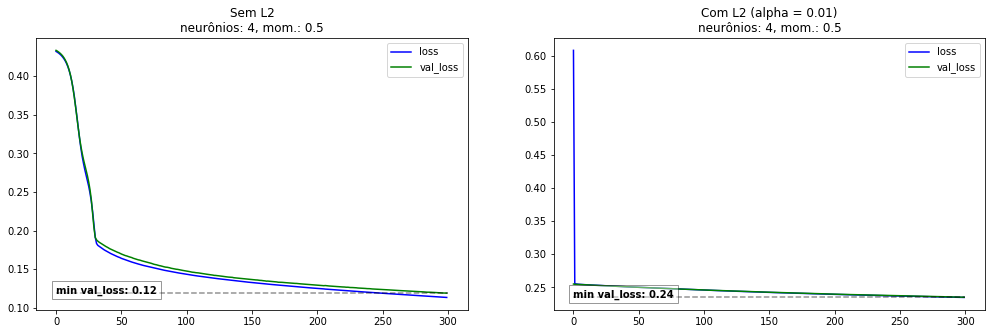

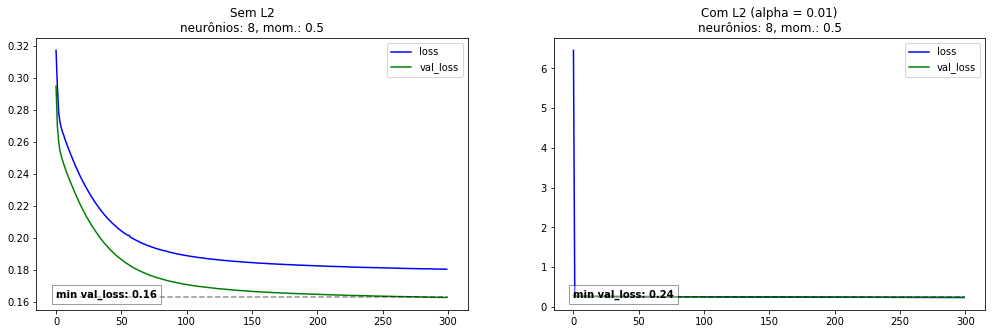

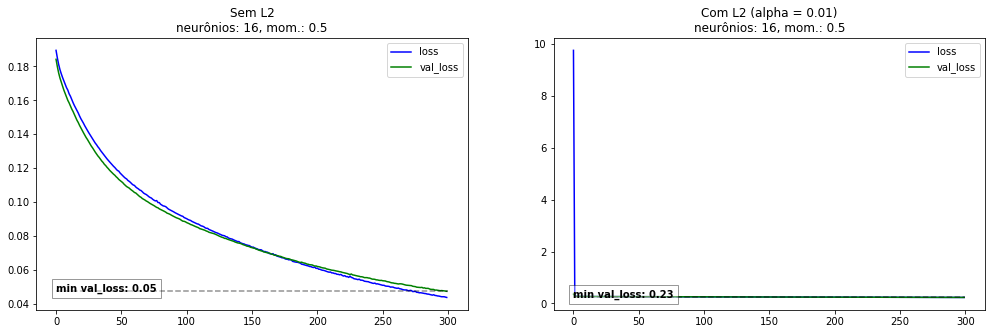

In [9]:
mom = 0.5
alpha = 0.01

for hl in [4, 8, 16]:
    model = Sequential()
    model.add(Dense(units=hl, activation='relu', input_dim=4))
    model.add(Dense(units=3, activation='softmax'))
    opt = optimizers.SGD(lr=lr, momentum=mom)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['categorical_accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

    loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
    fig, ax = plt.subplots(1, 2, figsize=(17, 5))
    ax[0].plot(loss, label='loss', color='blue')
    ax[0].plot(val_loss, label='val_loss', color='green')
    ax[0].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
    ax[0].text(0, val_loss.min(), 'min val_loss: %.2f'%val_loss.min(), 
              fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
    ax[0].legend()
    ax[0].set_title('Sem L2\nneurônios: %s, mom.: %s'%(hl, mom))


    model = Sequential()
    model.add(Dense(units=hl, kernel_regularizer=l2(alpha), activity_regularizer=l2(alpha),
                    activation='relu', input_dim=4))
    model.add(Dense(units=3, activation='softmax'))
    opt = optimizers.SGD(lr=lr, momentum=mom)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['categorical_accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

    loss, val_loss = np.array(history.history['loss']), np.array(history.history['val_loss'])
    ax[1].plot(loss, label='loss', color='blue')
    ax[1].plot(val_loss, label='val_loss', color='green')
    ax[1].plot([0, len(val_loss)], [val_loss.min(), val_loss.min()], color='#0000006D', linestyle='--')
    ax[1].text(0, val_loss.min(), 'min val_loss: %.2f'%val_loss.min(), 
              fontweight=1000, bbox=dict(facecolor='white', alpha=.4))
    ax[1].legend()
    ax[1].set_title('Com L2 (alpha = %s)\nneurônios: %s, mom.: %s'%(alpha, hl, mom))

    plt.savefig('results/regularizer_hl%s_001_iris.pdf'%(hl), dpi=300, \
               bbox_inches='tight', transparent=False, pad_inches=0.1)

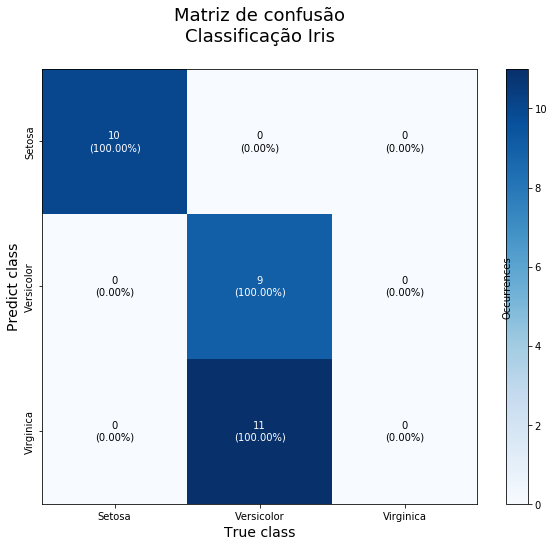

In [10]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
figsize = (15, 8)
fig, ax = plt.subplots(1, 1, figsize=figsize)

cmap = plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)

total_samples = cm.sum(axis=1)[:, np.newaxis]
normed_conf_mat = cm.astype('float') / total_samples
labels = ['Setosa', 'Versicolor', 'Virginica']
label_font = dict(fontweight='normal', size=14)
title_font = dict(fontweight='normal', size=18)

matshow = ax.matshow(cm, cmap=cmap)
cb = plt.colorbar(matshow, cax=cax, orientation='vertical')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text = str(cm[i, j])
        cell_text += '\n(%.2f%%)' % (normed_conf_mat[i, j] * 100)
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels, rotation=90, va='center')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
ax.set_xlabel('True class', fontdict=label_font)
ax.set_ylabel('Predict class', fontdict=label_font)
cb.ax.set_ylabel('Occurrences', va='center', rotation=-270, labelpad=-40)
ax.set_title('Matriz de confusão\nClassificação Iris', fontdict=title_font)

plt.savefig('results/confusion_matrix_001_iris.pdf', dpi=300, \
           bbox_inches='tight', transparent=False, pad_inches=0.1)
plt.show()